# CS145: Final project | IPL Statistics: What are the major factors that correlate to a team's ultimate chance of winning?

# Collaborators:
Please list the names and SUNet IDs of your collaborators below:
* Sagarika Samavedi, sagarika


# Project Overview

---
The main question I am trying to answer is **"What are the major factors that correlate to a team's ultimate chance of winning in the IPL? What factors affect the total runs scored for a team?"**

The Indian Premier League (IPL) (also known as the TATA IPL for sponsorship reasons) is a men's Twenty20 (T20) cricket league that is annually held in India and contested by ten city-based franchise teams.
The IPL is the most-popular cricket league in the world. There have been 16 seasons of IPL so far, and the game is only growing.

I hope to analyze several subsections of a cricket match to better understand what factors correlate to a team's win rate, and how many runs they score.

The subsections I will look at include:
- Pregame Toss
- Match Venue
- Batting Metrics
- Bowling Metrics

# Analysis of Dataset


## Dataset summary
I am using the Kaggle IPL 2008 to 2022 All Match Dataset. for this project. It includes two data tables:
- `IPL_Matches_2008_2022` (480 KB): This contains summary data of each match for IPL 2008-2022, including the match id, teams that played, players, venue, toss and innings info, match winner, and more.
- `IPL_Ball_by_Ball_2008_2221` (21 MB): This contains data for each ball delivery in the IPL in 15 seasons. It is useful for understanding batting and bowling statistics, run scoring, wickets, and more.

## IPL Match Data (480 KB)

**Total Entries:** 950 matches

**Columns:** 20, including match ID, city, date, season, teams, venue, toss details, winning team, margin, player of the match, players, and umpires.

**Data Types:** Mostly object (string) types, with some integers and floats.



## IPL Ball-by-Ball Data (21 MB)

**Total Entries:** 225,955 records (balls faced)

**Columns:** 17, including match ID, innings, overs, ball number, batter, bowler, runs, wickets, and other relevant details.

**Data Types:** Mostly integers and objects (strings).



## Reasons Behind Dataset Choice
I chose this Dataset because I wam very interested in Cricket in general. I am an avid IPL watcher and I wanted to pick a dataset on a topic I was highly interested in. There were very few IPL datasets to choose from. I liked that the tables had a common paramed, match_id, for join operations.
I believe there is a lot of data to explore in the Ball-By-Ball dataset, which contains information for 225,955 deliveries. There are also ways to split the 951 matches into subsections, such as team metrics per game, which leads to double the samples.


## Relating The Tables

The two tables used have one parameter in common: Match_id. The id was taken from ESPN Cricinfo's id given to each match. Some other ways to organize the data include by team or player.


In general, the tables are organized roughly the same way, with minimal foreign keys between them. The joins will be with the match_id attribute.

# Data Exploration

### Dependencies and Setup

In [ ]:
# Run this cell to authenticate yourself to BigQuery
from google.colab import auth
auth.authenticate_user()
project_id = "cs-145-project-23-401300"

In [ ]:
# Initialize BiqQuery client
from google.cloud import bigquery
client = bigquery.Client(project=project_id)

In [ ]:
# Imports
import matplotlib.pyplot as plt
# We need latest version of plotly
import plotly.express as px
from urllib.request import urlopen
import json
%matplotlib inline
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Preview Data
This section gives a basic preview of the underlying data in the tables.

Preview Matches Table

In [ ]:
# Preview
%%bigquery --project $project_id

SELECT * FROM `cs-145-project-23-401300.IPL_cricket.IPL_Matches_2008_2022` LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,392195,Cape Town,2009-04-26,2009,15,Kings XI Punjab,Rajasthan Royals,Newlands,Kings XI Punjab,bat,N,Kings XI Punjab,Runs,27,NA,KC Sangakkara,"['RS Bopara', 'K Goel', 'KC Sangakkara', 'Yuvr...","['SA Asnodkar', 'GC Smith', 'RJ Quiney', 'YK P...",M Erasmus,K Hariharan
1,392188,Cape Town,2009-04-22,2009,8,Royal Challengers Bangalore,Deccan Chargers,Newlands,Deccan Chargers,bat,N,Deccan Chargers,Runs,24,NA,AC Gilchrist,"['JD Ryder', 'RV Uthappa', 'JH Kallis', 'KP Pi...","['AC Gilchrist', 'HH Gibbs', 'VVS Laxman', 'RG...",M Erasmus,AM Saheba
2,392182,Cape Town,2009-04-18,2009,2,Royal Challengers Bangalore,Rajasthan Royals,Newlands,Royal Challengers Bangalore,bat,N,Royal Challengers Bangalore,Runs,75,NA,R Dravid,"['JD Ryder', 'RV Uthappa', 'LRPL Taylor', 'KP ...","['GC Smith', 'SA Asnodkar', 'NK Patel', 'T Hen...",BR Doctrove,RB Tiffin
3,392181,Cape Town,2009-04-18,2009,1,Chennai Super Kings,Mumbai Indians,Newlands,Chennai Super Kings,field,N,Mumbai Indians,Runs,19,NA,SR Tendulkar,"['PA Patel', 'ML Hayden', 'SK Raina', 'A Flint...","['ST Jayasuriya', 'SR Tendulkar', 'S Dhawan', ...",BR Doctrove,K Hariharan
4,392234,Durban,2009-05-20,2009,54,Chennai Super Kings,Kings XI Punjab,Kingsmead,Chennai Super Kings,bat,N,Chennai Super Kings,Runs,24,NA,M Muralitharan,"['GJ Bailey', 'PA Patel', 'SK Raina', 'S Badri...","['S Sohal', 'SM Katich', 'LA Pomersbach', 'Yuv...",BG Jerling,SJA Taufel


Preview Ball-by-Ball Table

In [ ]:
%%bigquery --project $project_id

SELECT * FROM `cs-145-project-23-401300.IPL_cricket.IPL_Ball_by_Ball_2008_2022` LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,ID,innings,overs,ballnumber,batter,bowler,non_striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,336032,1,19,6,RV Uthappa,VY Mahesh,A Nel,NA,1,0,1,0,1,A Nel,run out,V Sehwag,Mumbai Indians
1,336032,1,19,4,RV Uthappa,VY Mahesh,A Nel,NA,6,0,6,0,0,NA,NA,NA,Mumbai Indians
2,336032,1,19,5,RV Uthappa,VY Mahesh,A Nel,NA,6,0,6,0,0,NA,NA,NA,Mumbai Indians
3,598040,1,18,5,R Bhatia,UT Yadav,B Lee,NA,0,0,0,0,0,NA,NA,NA,Kolkata Knight Riders
4,548315,1,18,4,LR Shukla,R Vinay Kumar,B Lee,NA,0,0,0,0,0,NA,NA,NA,Kolkata Knight Riders


## Combined Data Preview

In [ ]:
%%bigquery --project $project_id

SELECT *
FROM `cs-145-project-23-401300.IPL_cricket.IPL_Matches_2008_2022` m
JOIN `cs-145-project-23-401300.IPL_cricket.IPL_Ball_by_Ball_2008_2022` b
ON m.ID = b.ID
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,336032,Delhi,2008-05-24,2008,50,Delhi Daredevils,Mumbai Indians,Feroz Shah Kotla,Delhi Daredevils,field,...,NA,1,0,1,0,1,A Nel,run out,V Sehwag,Mumbai Indians
1,336032,Delhi,2008-05-24,2008,50,Delhi Daredevils,Mumbai Indians,Feroz Shah Kotla,Delhi Daredevils,field,...,NA,6,0,6,0,0,NA,NA,NA,Mumbai Indians
2,336032,Delhi,2008-05-24,2008,50,Delhi Daredevils,Mumbai Indians,Feroz Shah Kotla,Delhi Daredevils,field,...,NA,6,0,6,0,0,NA,NA,NA,Mumbai Indians
3,598040,Raipur,2013-05-01,2013,44,Delhi Daredevils,Kolkata Knight Riders,Shaheed Veer Narayan Singh International Stadium,Kolkata Knight Riders,bat,...,NA,0,0,0,0,0,NA,NA,NA,Kolkata Knight Riders
4,548315,Bangalore,2012-04-10,2012,10,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,NA,0,0,0,0,0,NA,NA,NA,Kolkata Knight Riders


# Data Analysis

There are several possible metrics to investigate and see if they could have a correlation with an IPL team's performance. In this analysis, I chose several subsections to take a deeper dive into.

- Pre-game toss
- Match Venue
- Top players in Batting and Bowling
- Power Play overs
- Performance at the start of an innings

Through exploring these concepts, I hope to find features that align with impacting a team's performance.

**Question: What are the winning percentages of IPL Franchises Across all Seasons 2008 - 2022**

I wanted to start by looking at the background of all teams. From watching the game, I noticed that some teams seem to perform better than others. I wanted to identify which teams these are.

This query calculates the total win percentage of each current IPL Franchise across all seasons they have existed. I chose to show only the win percentages of the current 10 Franchises because they are the most relevant

*Note that I grouped the data from some of the franchhises that changed names: the Punjab Kings and the Delhi Capitals. They each changed names once in the past, so i aggregated the data under both franchise names for this win percentage*

In [ ]:
%%bigquery --project $project_id
WITH NormalizedTeamNames AS (
    SELECT ID,
        CASE
            WHEN Team1 IN ('Delhi Daredevils', 'Delhi Capitals') THEN 'Delhi Capitals'
            WHEN Team1 IN ('Kings XI Punjab', 'Punjab Kings') THEN 'Punjab Kings'
            ELSE Team1
        END AS NormalizedTeam1,
        CASE
            WHEN Team2 IN ('Delhi Daredevils', 'Delhi Capitals') THEN 'Delhi Capitals'
            WHEN Team2 IN ('Kings XI Punjab', 'Punjab Kings') THEN 'Punjab Kings'
            ELSE Team2
        END AS NormalizedTeam2,
        CASE
            WHEN WinningTeam IN ('Delhi Daredevils', 'Delhi Capitals') THEN 'Delhi Capitals'
            WHEN WinningTeam IN ('Kings XI Punjab', 'Punjab Kings') THEN 'Punjab Kings'
            ELSE WinningTeam
        END AS NormalizedWinningTeam
    FROM
        `cs-145-project-23-401300.IPL_cricket.IPL_Matches_2008_2022`
),
TeamStats AS (
    SELECT NormalizedTeam, COUNT(*) AS TotalMatches, SUM(CASE WHEN NormalizedWinningTeam = NormalizedTeam THEN 1 ELSE 0 END) AS MatchesWon
    FROM (
        SELECT NormalizedTeam1 AS NormalizedTeam, NormalizedWinningTeam FROM NormalizedTeamNames
        UNION ALL
        SELECT NormalizedTeam2, NormalizedWinningTeam FROM NormalizedTeamNames
    )
    GROUP BY NormalizedTeam
)
SELECT NormalizedTeam AS Team, TotalMatches, MatchesWon, ROUND(MatchesWon * 100.0 / TotalMatches, 2) AS WinPercentage
FROM TeamStats
WHERE NormalizedTeam IN ('Chennai Super Kings', 'Kolkata Knight Riders', 'Gujarat Titans', 'Mumbai Indians',
                         'Delhi Capitals', 'Lucknow Super Giants', 'Punjab Kings',
                         'Royal Challengers Bangalore', 'Rajasthan Royals', 'Sunrisers Hyderabad')
ORDER BY WinPercentage DESC

Query is running:   0%|          |

Downloading:   0%|          |

,Team,TotalMatches,MatchesWon,WinPercentage
0,Gujarat Titans,16,12,75.00
1,Lucknow Super Giants,15,9,60.00
2,Chennai Super Kings,208,121,58.17
3,Mumbai Indians,231,131,56.71
4,Kolkata Knight Riders,223,114,51.12
5,Rajasthan Royals,192,96,50.00
6,Sunrisers Hyderabad,152,75,49.34
7,Royal Challengers Bangalore,226,109,48.23
8,Punjab Kings,218,101,46.33
9,Delhi Capitals,224,103,45.98


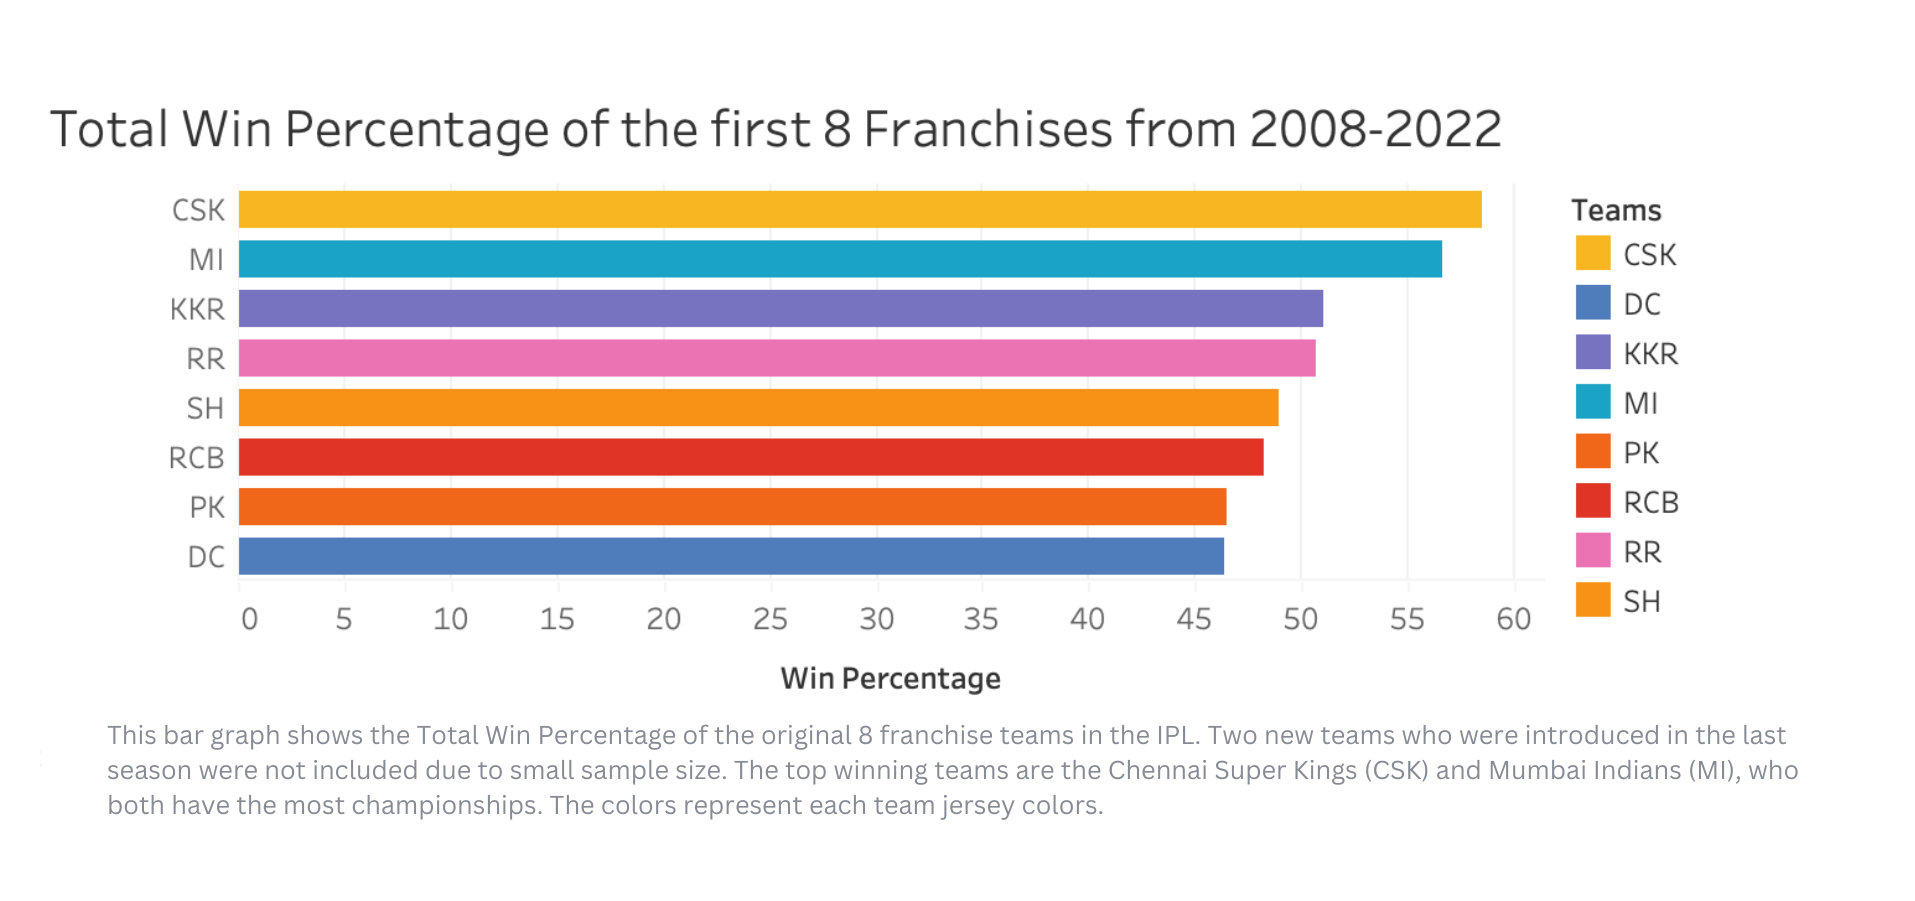

In [ ]:
Image('/content/drive/MyDrive/Stanford/Images_cs145/TotalWinPercentage.png')

> **Figure 1:** This bar graph shows the Total Win Percentage of the original 8 franchise teams in the IPL. Two new teams who were introduced in the last season were not inclcuded due to small sample size. The top winning teams are the Chennai Super Kings (CSK) and Mumbai Indians (MI), who both have the most championships. The colors represent each team's jersey colors.

## Winning the Opening Toss

**Question: Do pregame decisions affect a team's chance of winning?**

The opening toss is the first event of a match. While it does not have a direct impact on a team's score, a captain's decision during a toss could be a measure of team strategy and impact the eventual match outcome.

The query below calculates the win percentage after a team wins the Opening Toss. It calculates the number of wins the Toss Winner has won divided by the total games that have been played.

In [ ]:
%%bigquery --project $project_id
SELECT
    ROUND(SUM(CASE WHEN TossWinner = WinningTeam THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS OverallWinPercentage
FROM
    `cs-145-project-23-401300.IPL_cricket.IPL_Matches_2008_2022`


Query is running:   0%|          |

Downloading:   0%|          |

,OverallWinPercentage
0,51.47


This means that when a team wins the toss, they will win the match about 51% of the time. This is not significantly better than the expected 50% so Winning the Toss may not be a significant factor individually to predict if an IPL team will win a match or not.

But there may be a correlation between certain teams and when they win the toss.

In [ ]:
%%bigquery df --project $project_id
WITH NormalizedTeamNames AS (
    SELECT
        ID,
        CASE
            WHEN TossWinner IN ('Delhi Daredevils', 'Delhi Capitals') THEN 'Delhi Capitals'
            WHEN TossWinner IN ('Kings XI Punjab', 'Punjab Kings') THEN 'Punjab Kings'
            ELSE TossWinner
        END AS NormalizedTossWinner,
        CASE
            WHEN WinningTeam IN ('Delhi Daredevils', 'Delhi Capitals') THEN 'Delhi Capitals'
            WHEN WinningTeam IN ('Kings XI Punjab', 'Punjab Kings') THEN 'Punjab Kings'
            ELSE WinningTeam
        END AS NormalizedWinningTeam
    FROM
        `cs-145-project-23-401300.IPL_cricket.IPL_Matches_2008_2022`
),
TossWinStats AS (
    SELECT
        NormalizedTossWinner AS Team,
        COUNT(*) AS TotalTossWins,
        SUM(CASE WHEN NormalizedTossWinner = NormalizedWinningTeam THEN 1 ELSE 0 END) AS MatchesWonAfterTossWin
    FROM NormalizedTeamNames
    GROUP BY NormalizedTossWinner
)
SELECT
    Team,
    TotalTossWins,
    MatchesWonAfterTossWin,
    ROUND(MatchesWonAfterTossWin * 100.0 / TotalTossWins, 2) AS TossWinWinPercentage
FROM TossWinStats
WHERE Team IN ('Chennai Super Kings', 'Kolkata Knight Riders', 'Gujarat Titans', 'Mumbai Indians',
               'Delhi Capitals', 'Lucknow Super Giants', 'Punjab Kings',
               'Royal Challengers Bangalore', 'Rajasthan Royals', 'Sunrisers Hyderabad')
ORDER BY TossWinWinPercentage DESC


Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
df

,Team,TotalTossWins,MatchesWonAfterTossWin,TossWinWinPercentage
0,Gujarat Titans,10,7,70.00
1,Chennai Super Kings,109,68,62.39
2,Lucknow Super Giants,7,4,57.14
3,Mumbai Indians,123,70,56.91
4,Kolkata Knight Riders,114,64,56.14
5,Royal Challengers Bangalore,105,53,50.48
6,Rajasthan Royals,99,49,49.49
7,Delhi Capitals,116,56,48.28
8,Sunrisers Hyderabad,74,34,45.95
9,Punjab Kings,94,40,42.55


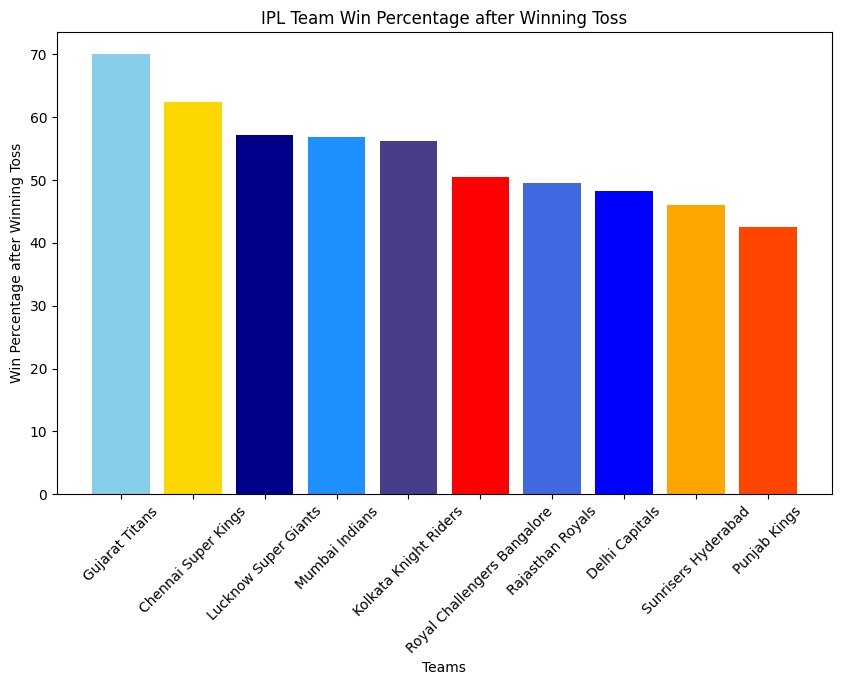

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(df['Team'], df['TossWinWinPercentage'], color=['skyblue', 'gold', 'darkblue', 'dodgerblue', 'darkslateblue',
                                                       'red', 'royalblue', 'blue', 'orange', 'orangered'])
plt.xlabel('Teams')
plt.ylabel('Win Percentage after Winning Toss')
plt.title('IPL Team Win Percentage after Winning Toss')
plt.xticks(rotation=45)
plt.show()

This analysis provides insights into how each team's performance post-toss win aligns with the overall trend in the IPL, and it can serve as a starting point for deeper investigations into individual team strategies and decision-making processes. These results show that certain teams have a better win percentage after winning the toss.

The bar chart presents the win percentages for various Indian Premier League (IPL) teams following a successful toss decision. The data suggests a variance in how different teams capitalize on the apparent strategic advantage of winning the toss, with an overarching win rate of 51% in such scenarios.

The Gujarat Titans lead the chart with a win percentage slightly above 65%, indicating a strong correlation between winning the toss and their subsequent success in the match. The Chennai Super Kings and Lucknow Super Giants follow closely, both with win percentages near the 60% mark, showcasing their ability to effectively leverage the initial momentum gained from a toss win.

Conversely, the Punjab Kings are situated at the lower end of the spectrum, with their win percentage after winning the toss hovering around 45%. This illustrates a challenge in converting the toss advantage into match victories, which may warrant further strategic evaluation.

A notable observation is that most teams have a win percentage that is either consistent with or above the overall win percentage after winning the toss, except for the Punjab Kings, Rajasthan Royals, Delhi Capitals, and Sunrisers Hyderabad, all of which fall below the 51% threshold. This disparity raises questions about the impact of other match conditions and team dynamics that could influence the final outcome of the game.




## Match Venue

In [ ]:
%%bigquery df1 --project $project_id
-- Calculate the total runs in each innings and associate with the city
WITH total_runs_innings AS (
    SELECT
        bb.ID,
        bb.BattingTeam,
        SUM(bb.total_run) AS total_runs_in_innings
    FROM `cs-145-project-23-401300.IPL_cricket.IPL_Ball_by_Ball_2008_2022` bb
    GROUP BY bb.ID, bb.BattingTeam
),
innings_city AS (
    SELECT
        tri.ID,
        tri.BattingTeam,
        tri.total_runs_in_innings,
        m.City
    FROM total_runs_innings tri
    JOIN `cs-145-project-23-401300.IPL_cricket.IPL_Matches_2008_2022` m ON tri.ID = m.ID
)

-- Save the average runs scored in each city to a table
SELECT
    City,
    AVG(total_runs_in_innings) AS city_average_runs
FROM innings_city
GROUP BY City

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
df1.head(5)

,City,city_average_runs
0,Delhi,157.890323
1,Raipur,145.083333
2,Bangalore,157.077519
3,Jaipur,151.744681
4,Kolkata,154.664557


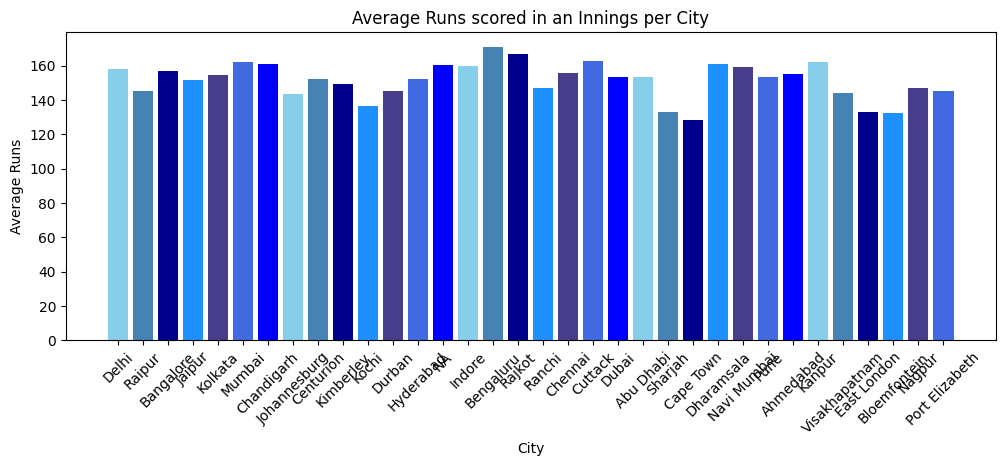

In [ ]:
plt.figure(figsize=(12,4))
plt.bar(df1['City'], df1['city_average_runs'], color=['skyblue', 'steelblue', 'darkblue', 'dodgerblue', 'darkslateblue',
                                                  'royalblue', 'blue'])
plt.xlabel('City')
plt.ylabel('Average Runs')
plt.title('Average Runs scored in an Innings per City')
plt.xticks(rotation=45)
plt.show()

I wanted to find the average runs scored in each match venue because in cricket, each venue has it's own quirks. In some venues the boundaries are closer in areas, the weather is different and the pitches are different.

Unfortunately there were several naming inconsistencies in the "venue" column in the dataset. So I calculated the next closest parameter to venue, which was city. There is clearly some amount of variation among each city. i think this is important to know if trying to predict final batting scores.

## Top Performing Players

### Batting



Batting in cricket is one of the central aspects of the game and is the action performed by the batsman to score runs. When a team is batting, it means that its players are at the crease attempting to score runs, while the opposing team is fielding and trying to prevent the scoring of runs and dismiss the batsmen.

**Importance of Batting in Cricket:**

Scoring Runs: The primary objective of batting is to score runs. In cricket, the team with the most runs at the end of the match is typically the winner. Batting allows the team to accumulate these runs.

Winning Matches: A team's batting performance is a strong determinant of its success in a match. Strong batting can lead to high scores, which put pressure on the opposing team and can defend while bowling.

Game Strategy: Batting involves strategic decision-making, such as when to play aggressively and when to be defensive. A batsman must read the game's situation and adjust his style accordingly to benefit the team.

Partnerships: Forming partnerships between the batsmen at the crease is crucial. A strong partnership can stabilize an innings and contribute significantly to the team’s total score.


For this part of the analysis, I want to focus on who are the top batting players in the IPL and quantify their performences through different metrics.

**Top Run Scorers through 2008-2022**

In [ ]:
%%bigquery topRunScorersdf --project $project_id
SELECT
    BallData.batter,
    SUM(BallData.batsman_run) AS TotalRuns,
    COUNT(DISTINCT MatchData.Season) AS NumberOfSeasons
FROM
    `cs-145-project-23-401300.IPL_cricket.IPL_Ball_by_Ball_2008_2022` AS BallData
JOIN
    `cs-145-project-23-401300.IPL_cricket.IPL_Matches_2008_2022` AS MatchData
ON BallData.ID = MatchData.ID
GROUP BY BallData.batter
ORDER BY TotalRuns DESC



Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
topRunScorersdf.head(10)

,batter,TotalRuns,NumberOfSeasons
0,V Kohli,6634,15
1,S Dhawan,6244,15
2,DA Warner,5883,13
3,RG Sharma,5881,15
4,SK Raina,5536,13
5,AB de Villiers,5181,14
6,CH Gayle,4997,13
7,MS Dhoni,4978,15
8,RV Uthappa,4954,15
9,KD Karthik,4377,15


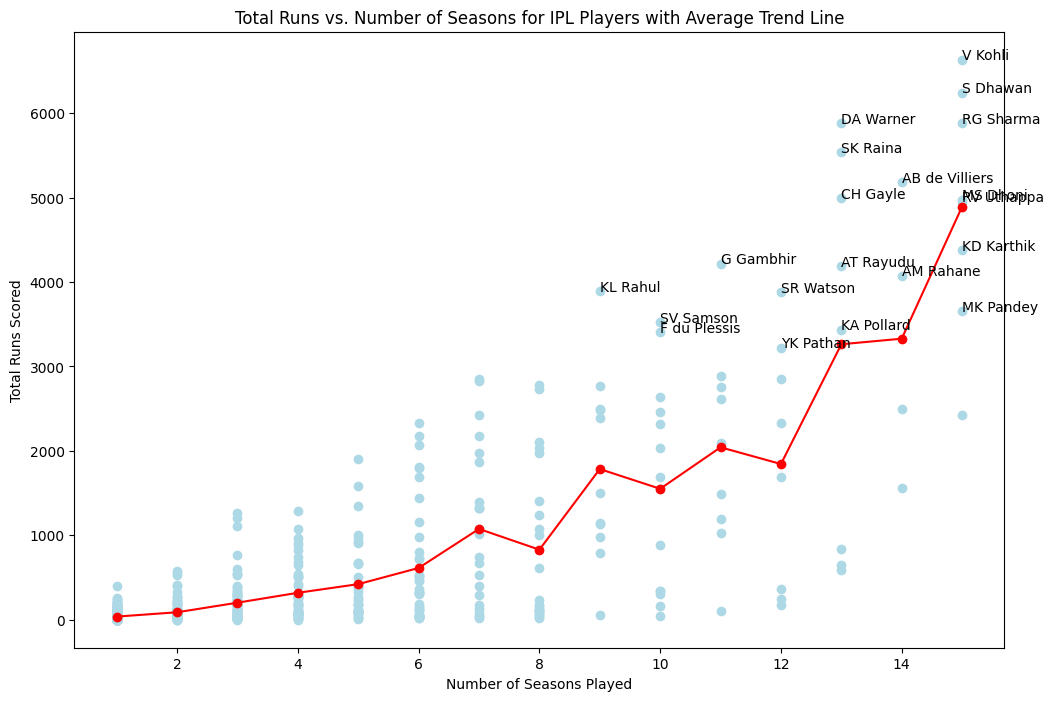

In [ ]:
# Calculate the average total runs for each distinct number of seasons
average_runs_by_season = topRunScorersdf.groupby('NumberOfSeasons')['TotalRuns'].mean().reset_index()

# Create the scatterplot for individual players
plt.figure(figsize=(12, 8))
plt.scatter(topRunScorersdf['NumberOfSeasons'], topRunScorersdf['TotalRuns'], color='lightblue')

# Label the top 10 run scorers
top_20 = topRunScorersdf.head(20)
for _, row in top_20.iterrows():
    plt.text(row['NumberOfSeasons'], row['TotalRuns'], row['batter'])

# Plot the average trend line
plt.plot(average_runs_by_season['NumberOfSeasons'], average_runs_by_season['TotalRuns'], 'r-o')

# Add labels and title
plt.xlabel('Number of Seasons Played')
plt.ylabel('Total Runs Scored')
plt.title('Total Runs vs. Number of Seasons for IPL Players with Average Trend Line')

# Show the plot
plt.show()

This is a plot of all the batters total runs scored based on the number of seasons they have played. It is natural that the players with the highest total of runs have played in the most seasons, but playing in many seassons also indicates that the player is experienced and has lasted for so long based on their performance as a player.

The read line plots the average runs scored by players in each Season total bracket. It starts out somewhat linear, but quickly turns upward. This is expected as many players will retire before reaching higher number of seasons, and only the best players will last through all 15 seasons. Still, players above the avereage should be considered as some of the best batters since they score more than the average expected.

**Top Batting Averages for Players**

In cricket, a players' batting average is the total number of runs they have scored divided by the number of times they have been out, usually given to two decimal places. Since the number of runs a player scores and how often they get out are primarily measures of their own playing ability, and largely independent of their teammates, batting average is a good metric for an individual player's skill as a batter.

In [ ]:
%%bigquery topBattingAveragesdf --project $project_id
SELECT
    batter,
    SUM(batsman_run) AS TotalRuns,
    COUNT(CASE WHEN isWicketDelivery = 1 AND player_out = batter THEN 1 END) AS TimesOut,
    SUM(batsman_run) / NULLIF(COUNT(CASE WHEN isWicketDelivery = 1 AND player_out = batter THEN 1 END), 0) AS BattingAverage
FROM `cs-145-project-23-401300.IPL_cricket.IPL_Ball_by_Ball_2008_2022`
GROUP BY batter
HAVING COUNT(CASE WHEN isWicketDelivery = 1 AND player_out = batter THEN 1 END) >= 10 -- Setting a minimum threshold for innings
ORDER BY BattingAverage DESC


Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
topBattingAveragesdf.head(10)

,batter,TotalRuns,TimesOut,BattingAverage
0,KL Rahul,3895,81,48.086420
1,HM Amla,577,13,44.384615
2,DA Warner,5883,137,42.941606
3,AB de Villiers,5181,122,42.467213
4,JP Duminy,2029,48,42.270833
5,OA Shah,506,12,42.166667
6,LMP Simmons,1079,26,41.500000
7,JC Buttler,2832,69,41.043478
8,A Symonds,974,24,40.583333
9,AK Markram,527,13,40.538462


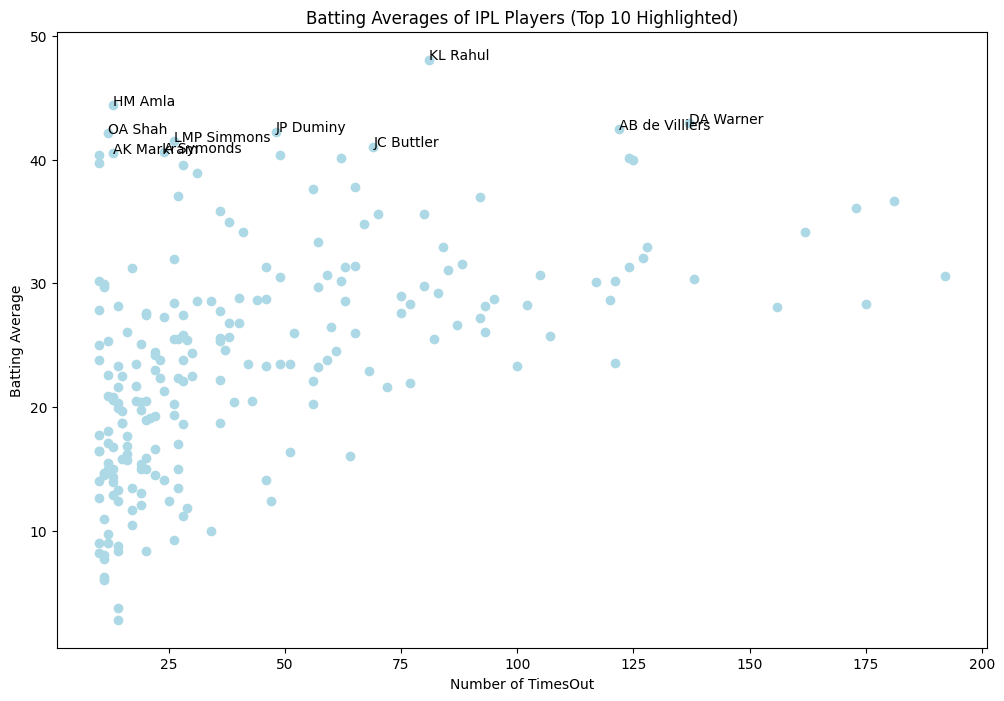

In [ ]:
# Sort the DataFrame by BattingAverage in descending order
topBattingAveragesdf.sort_values(by='BattingAverage', ascending=False, inplace=True)

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(topBattingAveragesdf['TimesOut'], topBattingAveragesdf['BattingAverage'], color='lightblue')

# Label the top 10 batters
top_10 = topBattingAveragesdf.head(10)
for _, row in top_10.iterrows():
    plt.text(row['TimesOut'], row['BattingAverage'], row['batter'])

# Add labels and title
plt.xlabel('Number of TimesOut')
plt.ylabel('Batting Average')
plt.title('Batting Averages of IPL Players (Top 10 Highlighted)')

# Show the plot
plt.show()

The scatter plot provided illustrates the relationship between the batting averages of IPL players and the number of times they have been dismissed ("Number of TimesOut"). The top 10 players by batting average are highlighted, which offers a quick visual assessment of the leading performers in this metric.

From the chart, we can observe that:

Top Performers: The top players, such as KL Rahul, AB de Villiers, and DA Warner, not only have high batting averages but also a substantial number of dismissals. This suggests that these players have maintained their high averages over a significant number of innings, indicating both consistency and reliability as batsmen.

Consistency vs. Longevity: Some players with very high batting averages have been dismissed fewer times, which could indicate either a shorter IPL career or less frequent appearances at the crease. Conversely, players with a high number of dismissals and lower averages might be regular players who haven't scored as heavily.

High Averages with Fewer Dismissals: A few players, such as HM Amla, have a high batting average with a relatively lower number of dismissals. This could be indicative of exceptional performance over a smaller number of matches, or it could reflect players who have recently entered the IPL and made a strong start.

Data Distribution: The majority of players are clustered within the middle range of batting averages and dismissals. This cluster represents the general performance standard in the IPL, with a few outliers demonstrating exceptionally high or low averages.

**Top Strike Rates**

Batting strike rate is a measure of how quickly a batter scores runs, measured in runs per 100 balls.

In limited overs cricket, strike rates are of considerably more important than measures such as batting average. Since each team only faces a limited number of balls in an innings (120), the faster a batter scores, the more runs the team will be able to accumulate. Strike rates of over 150 are becoming common in T20 cricket, like IPL.

In [ ]:
%%bigquery topStrikeRatedf --project $project_id
SELECT
    batter,
    SUM(batsman_run) AS TotalRuns,
    COUNT(*) AS BallsFaced,
    (SUM(batsman_run) / NULLIF(COUNT(*), 0)) * 100 AS StrikeRate
FROM `cs-145-project-23-401300.IPL_cricket.IPL_Ball_by_Ball_2008_2022`
GROUP BY batter
HAVING COUNT(*) >= 500 -- Minimum number of balls faced
ORDER BY StrikeRate DESC
LIMIT 20


Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
topStrikeRatedf

,batter,TotalRuns,BallsFaced,StrikeRate
0,AD Russell,2039,1212,168.234323
1,SP Narine,1025,664,154.367470
2,V Sehwag,2728,1833,148.827059
3,AB de Villiers,5181,3487,148.580442
4,GJ Maxwell,2320,1571,147.676639
5,JC Buttler,2832,1955,144.859335
6,N Pooran,912,630,144.761905
7,SO Hetmyer,831,577,144.020797
8,PP Shaw,1588,1106,143.580470
9,RR Pant,2851,2000,142.550000


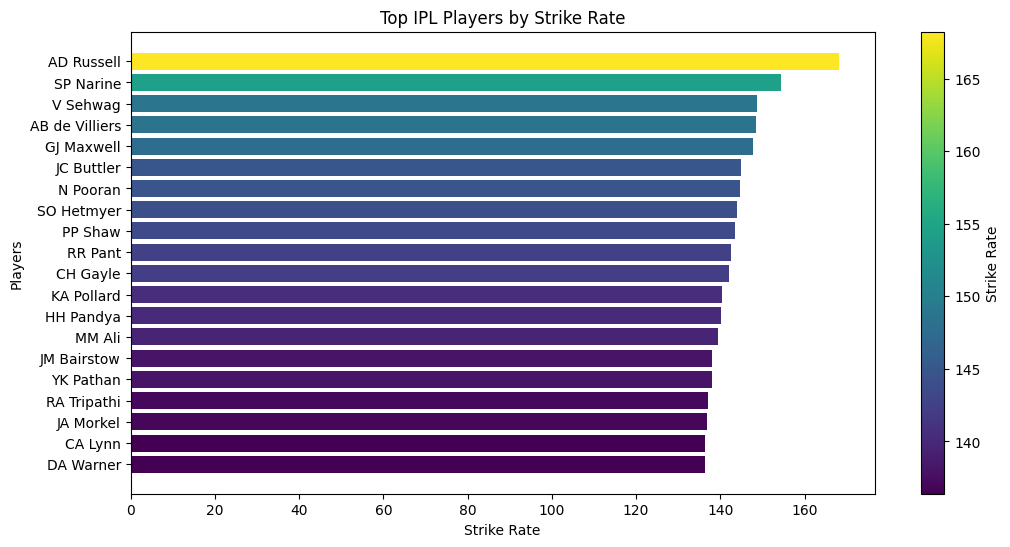

In [ ]:
# Sort the DataFrame if not already sorted by StrikeRate
topStrikeRatedf.sort_values(by='StrikeRate', ascending=True, inplace=True)

# Create the horizontal bar chart
plt.figure(figsize=(12, 6))

# Generating a color map
norm = mcolors.Normalize(vmin=topStrikeRatedf['StrikeRate'].min(), vmax=topStrikeRatedf['StrikeRate'].max())
colors = plt.cm.viridis(norm(topStrikeRatedf['StrikeRate']))

# Plotting with gradient colors
plt.barh(topStrikeRatedf['batter'], topStrikeRatedf['StrikeRate'], color=colors)

# Add labels and title
plt.xlabel('Strike Rate')
plt.ylabel('Players')
plt.title('Top IPL Players by Strike Rate')

# Show the plot
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), ax=plt.gca(), label='Strike Rate')

# Show the plot
plt.show()

These are the players who have the highest strike rates in the IPL (min 500 balls faced). These players score more runs per ball, which is critical in a match where only a maximum of 120 balls are bowled. The strike rate of a player is an important measure of predicting how many runs a player can be expected to score.

The strike rate is a better metric of analyzing a batter's consistency than batting average because
1) It includes data from matches where the player did not get out, which is not considered in batting average
2) IPL is the shortest form of cricket match, T20. Players need to score quickly in a small number of overs, and strike rate shows just how much imapct per ball a player is making.

**Top Hitters (Most Boundaries Scored)**

In cricket, large chunks of runs can be scored from boundaries. When a ball reaches the boundary of the field while touching the grass, the player scores four runs. When a ball reaches the boundary of the field through the air, a player scores six runs. these are critical for maximizing the runs gained per ball.

The query below calculates the players who have scored the most boundaries (4s and 6s combined). These are some of the most impactful players to score runs quickly in a game.

In [ ]:
%%bigquery topBoundariesdf --project $project_id
SELECT
    batter,
    SUM(CASE WHEN batsman_run = 4 THEN 1 ELSE 0 END) AS TotalFours,
    SUM(CASE WHEN batsman_run = 6 THEN 1 ELSE 0 END) AS TotalSixes,
    SUM(CASE WHEN batsman_run = 4 OR batsman_run = 6 THEN 1 ELSE 0 END) AS TotalBoundaries
FROM `cs-145-project-23-401300.IPL_cricket.IPL_Ball_by_Ball_2008_2022`
GROUP BY batter
ORDER BY TotalBoundaries DESC
LIMIT 20

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
topBoundariesdf

,batter,TotalFours,TotalSixes,TotalBoundaries
0,S Dhawan,701,137,838
1,V Kohli,581,219,800
2,DA Warner,577,216,793
3,CH Gayle,408,359,767
4,RG Sharma,519,241,760
5,SK Raina,506,204,710
6,AB de Villiers,414,253,667
7,RV Uthappa,481,182,663
8,MS Dhoni,346,229,575
9,SR Watson,377,190,567


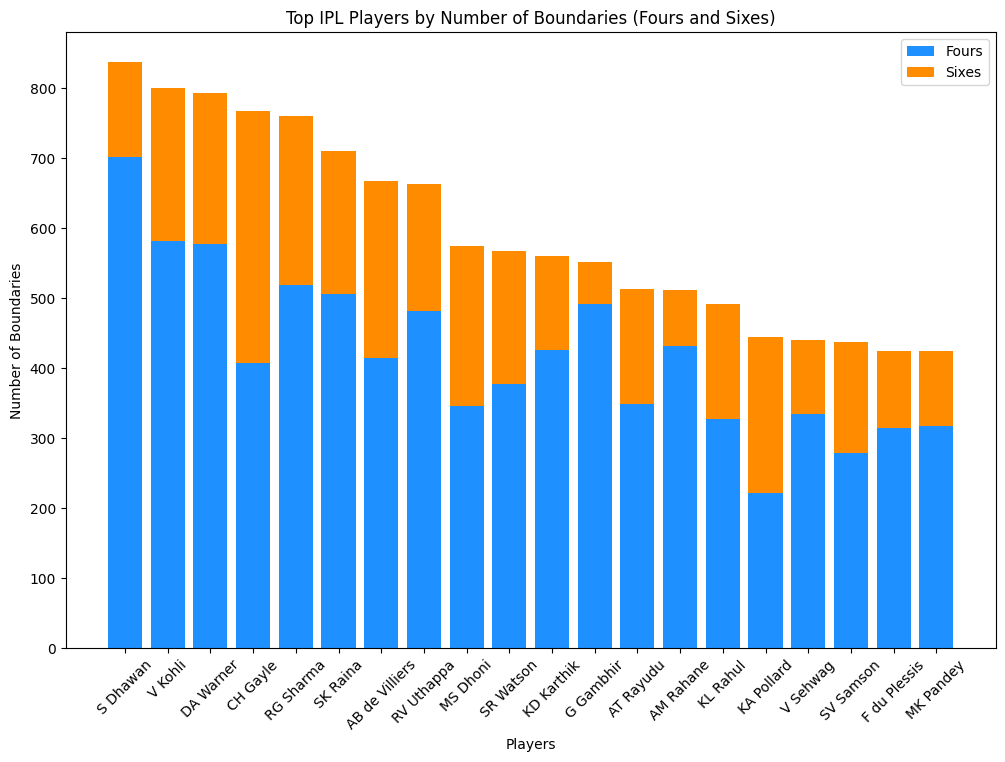

In [ ]:
# Create the stacked bar chart
plt.figure(figsize=(12, 8))
plt.bar(topBoundariesdf['batter'], topBoundariesdf['TotalFours'], label='Fours', color='dodgerblue')
plt.bar(topBoundariesdf['batter'], topBoundariesdf['TotalSixes'], bottom=topBoundariesdf['TotalFours'], label='Sixes', color='darkorange')

# Add labels and title
plt.xlabel('Players')
plt.ylabel('Number of Boundaries')
plt.title('Top IPL Players by Number of Boundaries (Fours and Sixes)')
plt.legend()
plt.xticks(rotation=45)

# Show the plot
plt.show()

Many of the same player names appear from previous batting measures. It can be assumed that when predicting the final number of runs scored, these players would be expected to reach higher run totals.

Another similar but slightly different way to look at the top hitters is to see how many runs the top players score off of boundaries.

The query below is similar, and calculates the actual runs scored from boundaries and ranks the top players by runs scored.

In [ ]:
%%bigquery topBoundaryRunsdf --project $project_id
SELECT
    batter,
    SUM(CASE WHEN batsman_run = 6 THEN 1 ELSE 0 END) AS TotalSixes,
    SUM(CASE WHEN batsman_run = 4 THEN 1 ELSE 0 END) AS TotalFours,
    SUM(CASE WHEN batsman_run = 4 OR batsman_run = 6 THEN 1 ELSE 0 END) AS TotalBoundaries,
    (SUM(CASE WHEN batsman_run = 6 THEN 1 ELSE 0 END))*6 + (SUM(CASE WHEN batsman_run = 4 THEN 1 ELSE 0 END))*4 AS TotalBoundaryRuns
FROM `cs-145-project-23-401300.IPL_cricket.IPL_Ball_by_Ball_2008_2022`
GROUP BY batter
ORDER BY TotalBoundaryRuns DESC
LIMIT 20

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
topBoundaryRunsdf.head(10)

,batter,TotalSixes,TotalFours,TotalBoundaries,TotalBoundaryRuns
0,CH Gayle,359,408,767,3786
1,V Kohli,219,581,800,3638
2,S Dhawan,137,701,838,3626
3,DA Warner,216,577,793,3604
4,RG Sharma,241,519,760,3522
5,SK Raina,204,506,710,3248
6,AB de Villiers,253,414,667,3174
7,RV Uthappa,182,481,663,3016
8,MS Dhoni,229,346,575,2758
9,SR Watson,190,377,567,2648


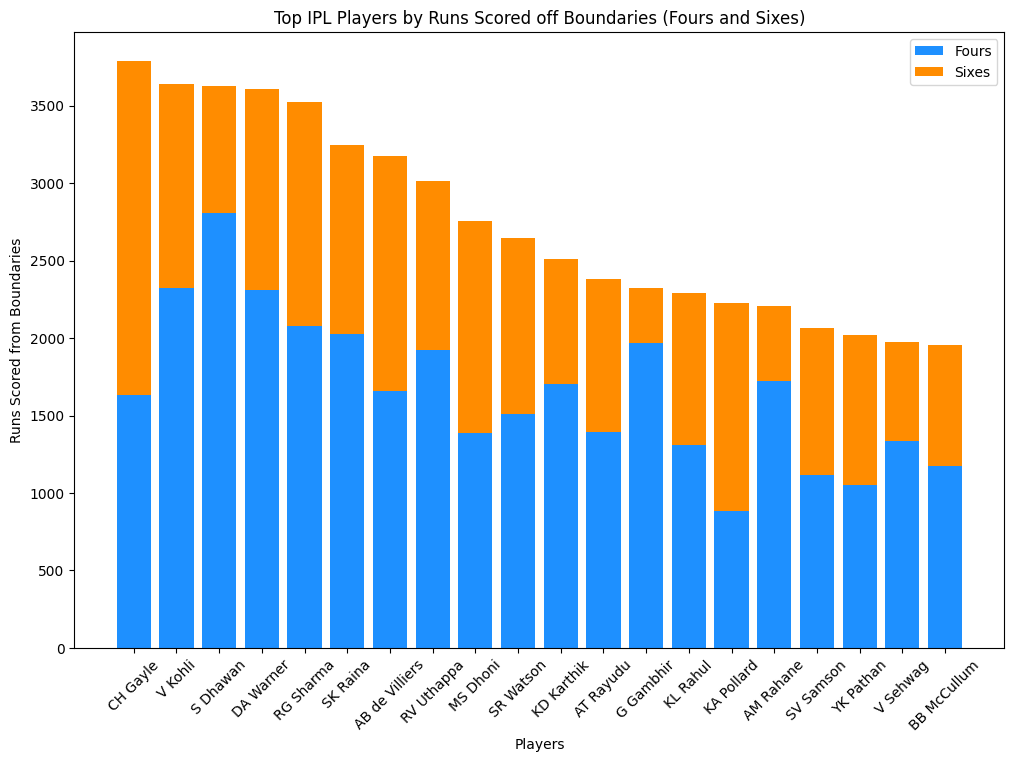

In [ ]:
# Create the stacked bar chart
plt.figure(figsize=(12, 8))
plt.bar(topBoundaryRunsdf['batter'], (topBoundaryRunsdf['TotalFours'] * 4), label='Fours', color='dodgerblue')
plt.bar(topBoundaryRunsdf['batter'], (topBoundaryRunsdf['TotalSixes'] * 6), bottom=(topBoundaryRunsdf['TotalFours'] * 4), label='Sixes', color='darkorange')

# Add labels and title
plt.xlabel('Players')
plt.ylabel('Runs Scored from Boundaries')
plt.title('Top IPL Players by Runs Scored off Boundaries (Fours and Sixes)')
plt.legend()
plt.xticks(rotation=45)

# Show the plot
plt.show()


Many of the same players as before are shown, but we can see that scoring sixes has a greater affect on total runs scored than scoring more fours.

### Bowling

Bowling, in cricket, is the action of propelling the ball toward the wicket defended by a batter. A player skilled at bowling is called a bowler.

the ultimate priority of the fielding side is to restrict the total number of runs scored by the batting side, and the actions of the bowlers will be fundamental to achieving this objective. The primary means of achieving this is by dismissing the batting side by getting all ten of the opposition wickets as quickly as possible. A secondary objective will be to keep the batting side's run rate as low as possible.

**Top Wicket Takers**

Lets start by looking at who are the top wicket takers across all seasons of IPL

In [ ]:
%%bigquery --project $project_id
SELECT
    bowler,
    COUNT(CASE WHEN isWicketDelivery = 1 THEN 1 END) AS TotalWickets
FROM `cs-145-project-23-401300.IPL_cricket.IPL_Ball_by_Ball_2008_2022`
GROUP BY bowler
ORDER BY TotalWickets DESC
LIMIT 10

Query is running:   0%|          |

Downloading:   0%|          |

,bowler,TotalWickets
0,DJ Bravo,207
1,SL Malinga,188
2,A Mishra,175
3,R Ashwin,174
4,YS Chahal,172
5,SP Narine,171
6,B Kumar,165
7,PP Chawla,165
8,Harbhajan Singh,161
9,JJ Bumrah,161


These are the raw wicket totals of the top wicket takers. We can safely assume that they are some of the best players on the bowling side. But lets see if there are more ways to measure their impact on individual games.

In [ ]:
%%bigquery --project $project_id
SELECT
    bowler,
    SUM(total_run) AS TotalRunsConceded,
    COUNT(*) / 6 AS OversBowled,  -- Dividing the total balls bowled by 6 to get overs
    (SUM(total_run) / (COUNT(*) / 6)) AS EconomyRate  -- Calculating economy rate
FROM `cs-145-project-23-401300.IPL_cricket.IPL_Ball_by_Ball_2008_2022`
WHERE  extra_type NOT IN ('wides', 'noballs')  -- Excluding wides and no-balls from the ball count
GROUP BY bowler
HAVING OversBowled > 20
ORDER BY EconomyRate
LIMIT 10

Query is running:   0%|          |

Downloading:   0%|          |

,bowler,TotalRunsConceded,OversBowled,EconomyRate
0,Mohsin Khan,190,33.000000,5.757576
1,Sohail Tanvir,255,41.166667,6.194332
2,FH Edwards,146,23.333333,6.257143
3,A Chandila,245,39.000000,6.282051
4,Rashid Khan,2371,368.000000,6.442935
5,SMSM Senanayake,208,32.000000,6.500000
6,A Kumble,1050,160.833333,6.528497
7,SM Pollock,303,46.000000,6.586957
8,SP Narine,3829,577.166667,6.634132
9,GD McGrath,360,54.000000,6.666667


In this case, the lower economy rates are considered better because it means the bowler is giving up the least amount of runs.

**Dot Balls**

Dot balls are ball deliveries bowled when the batting team scores 0 runs. These are very good for the bowling team and can slow down an opposing team's batting strike rate.

In [ ]:
%%bigquery --project $project_id

SELECT
    bowler,
    COUNT(*) AS TotalDotBalls,  -- Total number of dot balls bowled
    COUNT(*) / COUNT(DISTINCT ID) AS AvgDotBallsPerGame  -- Average dot balls per game
FROM `cs-145-project-23-401300.IPL_cricket.IPL_Ball_by_Ball_2008_2022`
WHERE
    total_run = 0 AND  -- Only deliveries where no runs were scored
    extra_type NOT IN ('wides', 'noballs')  -- Excluding wides and no-balls
GROUP BY bowler
ORDER BY AvgDotBallsPerGame DESC
LIMIT 10

Query is running:   0%|          |

Downloading:   0%|          |

,bowler,TotalDotBalls,AvgDotBallsPerGame
0,Mohsin Khan,105,11.666667
1,FH Edwards,70,11.666667
2,Sohail Tanvir,121,11.000000
3,M Ntini,99,11.000000
4,SM Harwood,33,11.000000
5,GD McGrath,153,10.928571
6,R Rampaul,130,10.833333
7,JC Archer,377,10.771429
8,DW Steyn,1019,10.726316
9,B Stanlake,64,10.666667


In [ ]:
%%bigquery df3 --project $project_id
SELECT
    bb.ID,
    COUNT(*) AS TotalDotBalls,
    CASE
        WHEN m.WinningTeam = bb.BattingTeam THEN 1
        ELSE 0
    END AS TeamWon
FROM `cs-145-project-23-401300.IPL_cricket.IPL_Ball_by_Ball_2008_2022` bb
JOIN `cs-145-project-23-401300.IPL_cricket.IPL_Matches_2008_2022` m ON bb.ID = m.ID
WHERE
    bb.total_run = 0 AND
    bb.extra_type NOT IN ('wides', 'noballs')
GROUP BY  bb.ID, bb.BattingTeam, m.WinningTeam;

Query is running:   0%|          |

Downloading:   0%|          |

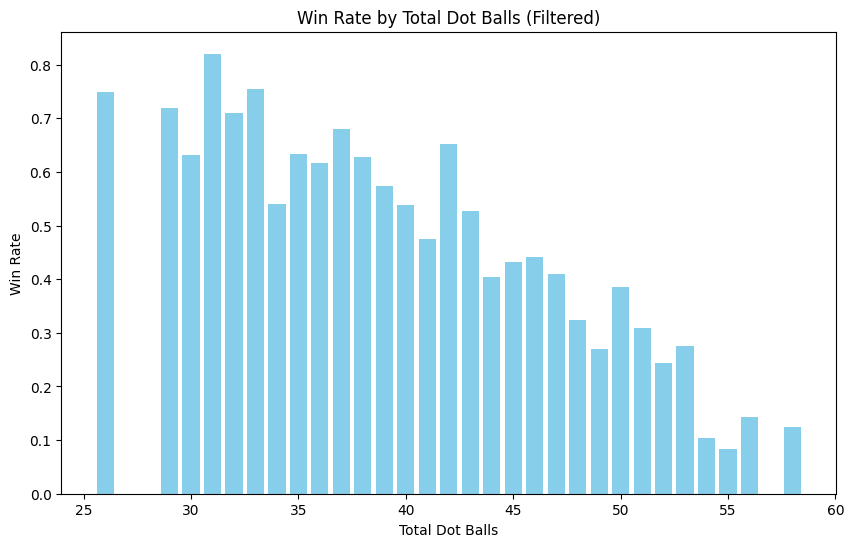

In [ ]:
# Grouping by TotalDotBalls and calculating mean and count
grouped = df3.groupby('TotalDotBalls')['TeamWon'].agg(['mean', 'count']).reset_index()

# Define a threshold for minimum sample size to be considered
threshold = 15  # Adjust this threshold as needed

# Filter out groups that don't meet the threshold
filtered_grouped = grouped[grouped['count'] >= threshold]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(filtered_grouped['TotalDotBalls'], filtered_grouped['mean'], color='skyblue')
plt.xlabel('Total Dot Balls')
plt.ylabel('Win Rate')
plt.title('Win Rate by Total Dot Balls (Filtered)')
plt.show()

Here is a histogram showing the impact of dot balls to the batting team. We can see a clear downward trend in win percentage when the batting team faces more dot balls. Dot balls make it much harder to overcome run deficits and kepp up pace with a high strike rate.

**Average Runs Scored in an Over**

To better understand the flow of bowling in a match, I want to look at the average run rate during each over number in an IPL match

In [ ]:
%%bigquery df4 --project $project_id
SELECT
    overs AS OverNumber,
    SUM(total_run) AS TotalRunsInOver,
    COUNT(DISTINCT ID) AS NumberOfMatches,
    (SUM(total_run) / COUNT(DISTINCT ID)) AS AvgRunsPerOver
FROM `cs-145-project-23-401300.IPL_cricket.IPL_Ball_by_Ball_2008_2022`
WHERE  overs < 20  -- Considering only overs 0 to 19
GROUP BY OverNumber
ORDER BY OverNumber


Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
df4

,OverNumber,TotalRunsInOver,NumberOfMatches,AvgRunsPerOver
0,0,11686,950,12.301053
1,1,13567,950,14.281053
2,2,15068,950,15.861053
3,3,15679,950,16.504211
4,4,15741,950,16.569474
5,5,15724,949,16.569020
6,6,12659,949,13.339305
7,7,13647,949,14.380400
8,8,14099,948,14.872363
9,9,13971,948,14.737342


<Figure size 1200x400 with 0 Axes>

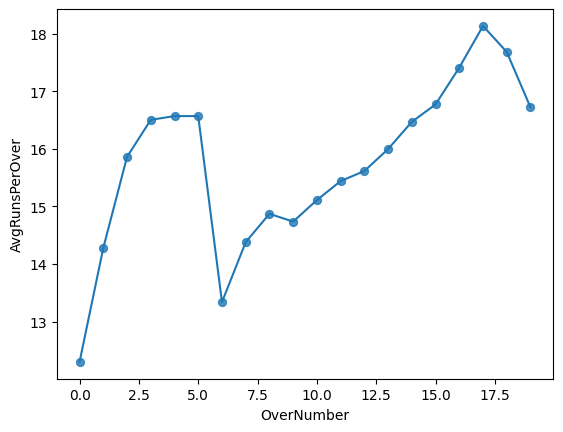

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 4))
df4.plot(kind='scatter', x='OverNumber', y='AvgRunsPerOver', s=32, alpha=.8)
plt.plot(df4['OverNumber'], df4['AvgRunsPerOver'])

These results were really unexpected to me. In this case after the first 6 overs, the runs per over **sharply** drops in the 7th over. The first 6 overs in IPL are known as the **power play**, where less fielders from the bowling team are allowed to gaurd the boundaries. This makes for higher scoring.

It shows very interesting trends, like how at the beginning of a match, the batsmen start off slow, likely to preserve their wicket and create a batting partnership.

## Power Play Overs

A powerplay is the name for the fielding restrictions in limited overs cricket. In IPL, during the first 6 overs of an innings, only a certain number of fielders can stand in the out field. This makes it easier to score boundaries for the batters. As a result, the power play is a critical oppurtunity for a team to accumulate more runs, so the run rate steadily increases.

Then after the power play, in the 7th over the run rate drops because batters must adjust to new fielding conditions. Finally towards the last overs, batters must maximize accumulating the last runs and make a final push.

In [ ]:
%%bigquery --project $project_id
SELECT
    bb.ID,
    bb.innings,
    SUM(bb.total_run) AS PowerplayRuns,  -- Sum of runs in the powerplay for each innings
    CASE
        WHEN bb.innings = 1 AND m.WinningTeam = m.Team1 THEN 1
        WHEN bb.innings = 1 AND m.WinningTeam != m.Team1 THEN 0
        WHEN bb.innings = 2 AND m.WinningTeam = m.Team2 THEN 1
        WHEN bb.innings = 2 AND m.WinningTeam != m.Team2 THEN 0
    END AS TeamWon
FROM `cs-145-project-23-401300.IPL_cricket.IPL_Ball_by_Ball_2008_2022` bb
JOIN `cs-145-project-23-401300.IPL_cricket.IPL_Matches_2008_2022` m ON bb.ID = m.ID
WHERE bb.overs < 6  -- Considering only the first 6 overs
GROUP BY bb.ID, bb.innings, m.WinningTeam, m.Team1, m.Team2
ORDER BY bb.ID, bb.innings
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,ID,innings,PowerplayRuns,TeamWon
0,335982,1,61,0
1,335982,2,26,1
2,335983,1,53,0
3,335983,2,63,1
4,335984,1,40,1


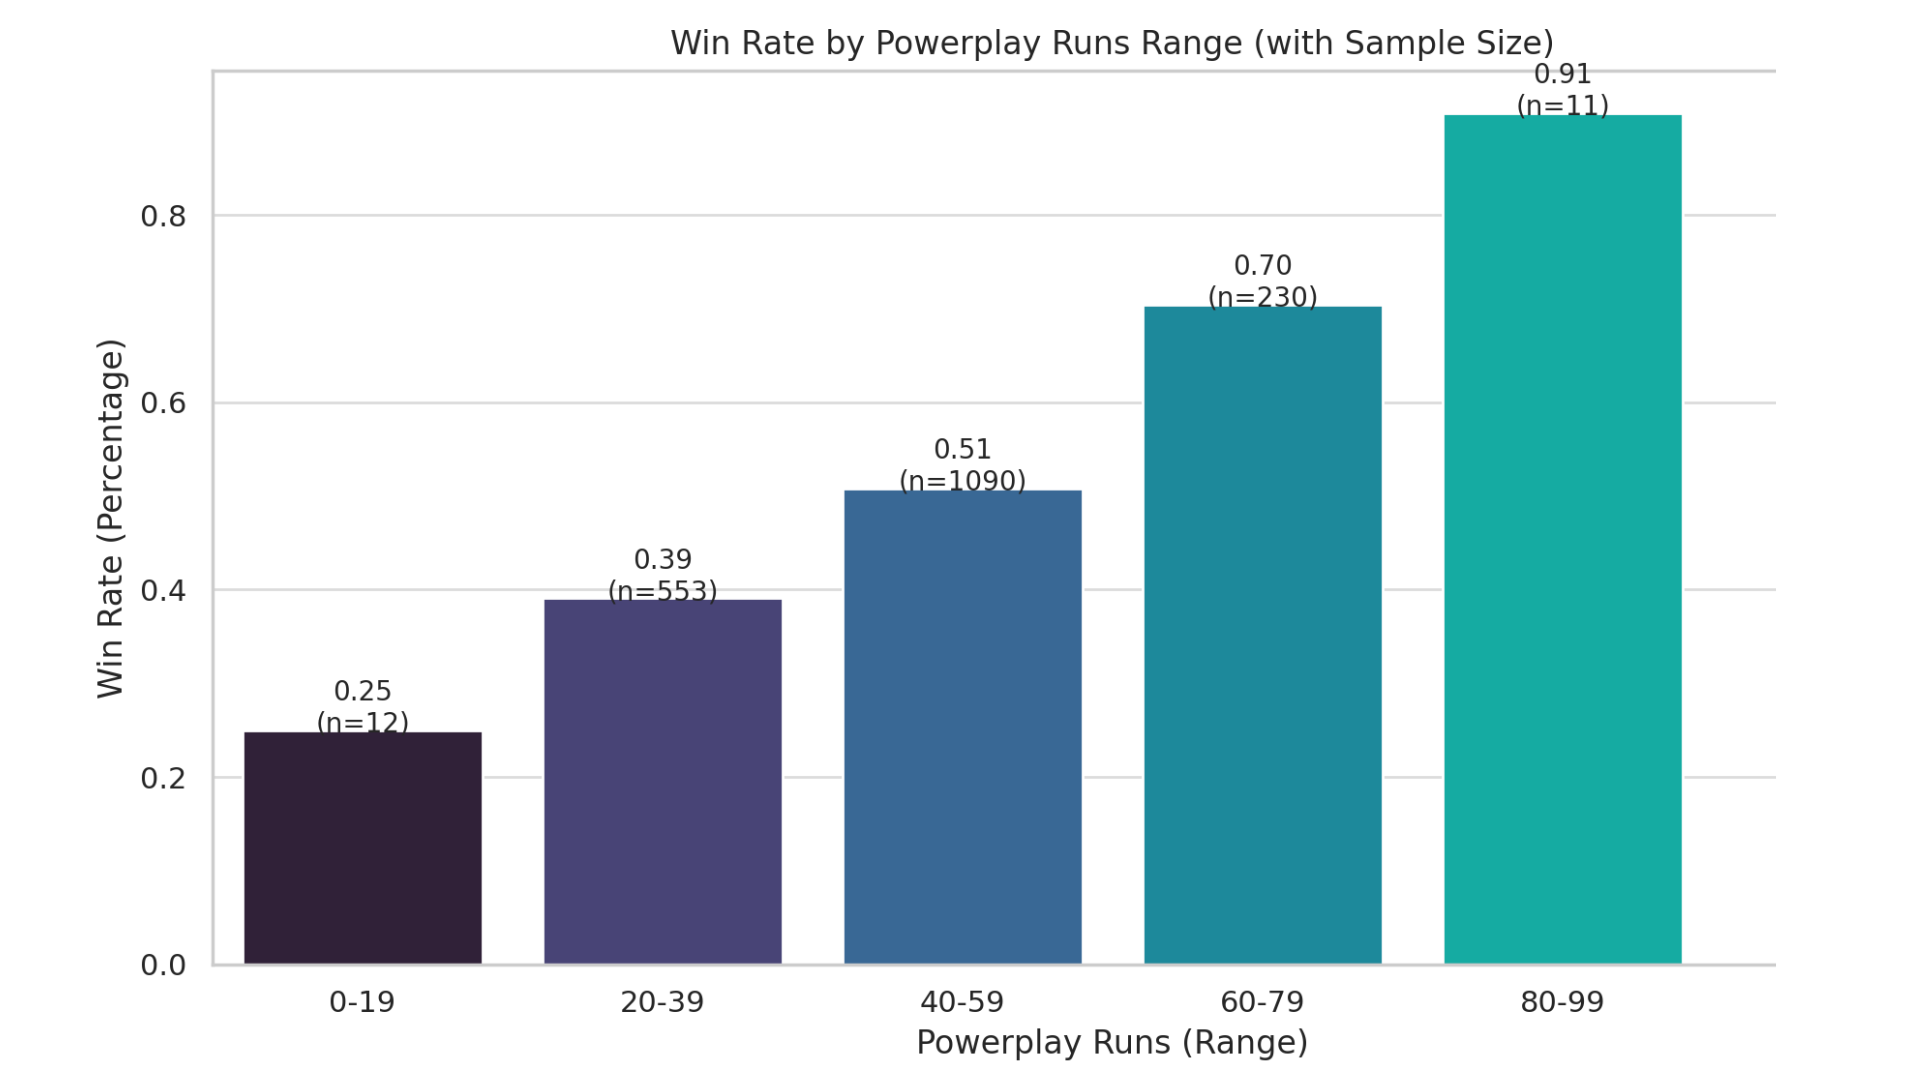

In [ ]:
image_path = '/content/drive/MyDrive/Stanford/Images_cs145/PowerPlay.png'
Image(filename=image_path)

## Opening Partnership Batting

**Question: How does the opening batting partnership affect a team's win rate?**

The opening partnership of batsmen is important because it sets the tone for the rest of the match. A strong partnership can dominate the other team, while an early wicket can be demoralizing.

In [ ]:
%%bigquery df6 --project $project_id
SELECT
    bb.ID,
    bb.innings,
    SUM(bb.total_run) AS OpeningPartnershipRuns,  -- Sum of runs during the opening partnership
    CASE
        WHEN bb.innings = 1 AND m.WinningTeam = m.Team1 THEN 1
        WHEN bb.innings = 1 AND m.WinningTeam != m.Team1 THEN 0
        WHEN bb.innings = 2 AND m.WinningTeam = m.Team2 THEN 1
        WHEN bb.innings = 2 AND m.WinningTeam != m.Team2 THEN 0
    END AS TeamWon
FROM `cs-145-project-23-401300.IPL_cricket.IPL_Ball_by_Ball_2008_2022` bb
JOIN `cs-145-project-23-401300.IPL_cricket.IPL_Matches_2008_2022` m ON bb.ID = m.ID
WHERE
    bb.overs < (
        SELECT MIN(overs)
        FROM `cs-145-project-23-401300.IPL_cricket.IPL_Ball_by_Ball_2008_2022` as bb2
        WHERE bb2.ID = bb.ID AND bb2.innings = bb.innings AND bb2.isWicketDelivery = 1
    )
GROUP BY bb.ID, bb.innings, m.WinningTeam, m.Team1, m.Team2
ORDER BY bb.ID, bb.innings


Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
df6.head(5)

,ID,innings,OpeningPartnershipRuns,TeamWon
0,335982,1,60,0
1,335982,2,4,1
2,335983,1,20,0
3,335983,2,47,1
4,335984,1,17,1


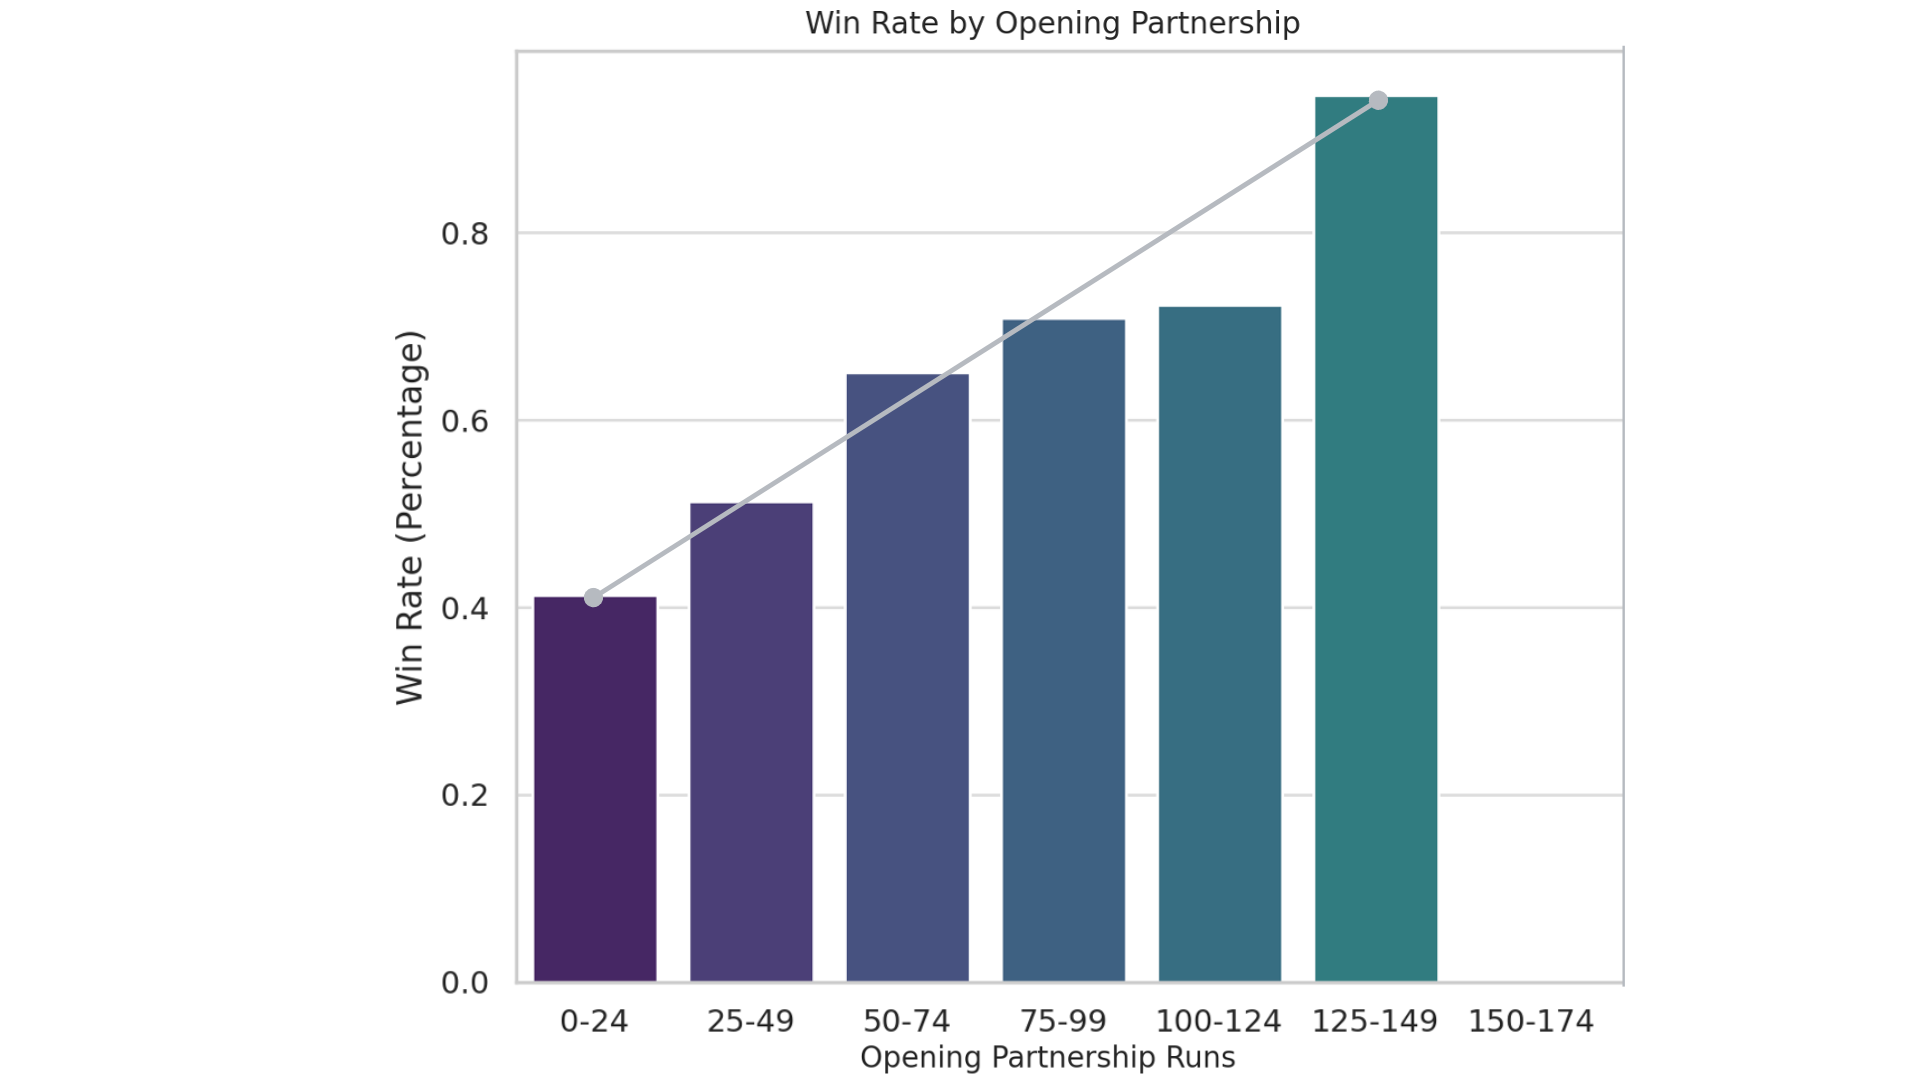

In [ ]:

image_path = '/content/drive/MyDrive/Stanford/Images_cs145/OpeningPartnership.png'

# Display the image
Image(filename=image_path)

We can see that there is a definite trend upward in win percentage, as opening partnerships that score more tend to win more games.

There is a correlation with this feature and win percentage, but Opening Partnerships can sometimes last the whole game, so it seems a bit unfair to use this as a modeling feature.

# Data Prediction


We will use a combination of several factors to make predictions based on the analysis from before.

- The average strike rate of the top 5 batsmen on the team
- The average runs scored in a city venue
- The total runs scored during the power play
- The over number when the first wicket falls
- The team's historic win percentage.

There are a few reasons why I don't want to include other metrics that were correlated to win percentage. I want to focus on seeing if we can predict a team's win rate from just early batting statistics. The statistics taken from late in a game feel like they were calculated after the result of a match is already forseen. I wanted this model to mimic a viewer or fan: as they are watching the match from the beginning, are there any early signs they can use to predict if their team is on track to win or not.

### Linear Regression

These are the queries to get the top 5 average strike rates of team members on a team (engineered feature)

In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE TABLE cs-145-project-23-401300.IPL_cricket.BatsmanStrikeRates AS
SELECT
    batter,
    SUM(batsman_run) AS TotalRuns,
    COUNT(*) AS BallsFaced,
    (SUM(batsman_run)/COUNT(*)) * 100 AS StrikeRate
FROM `cs-145-project-23-401300.IPL_cricket.IPL_Ball_by_Ball_2008_2022`
GROUP BY batter;


Query is running:   0%|          |

""


In [ ]:
%%bigquery --project $project_id
-- Prepare match data with player names, converting string to array and removing apostrophes
WITH match_player_data AS (
    SELECT
        ID,
        Team1 AS team,
        SPLIT(REPLACE(REPLACE(REPLACE(Team1Players, '[', ''), ']', ''), '\'', ''), ', ') AS players
    FROM `cs-145-project-23-401300.IPL_cricket.IPL_Matches_2008_2022`
    UNION ALL
    SELECT
        ID,
        Team2 AS team,
        SPLIT(REPLACE(REPLACE(REPLACE(Team2Players, '[', ''), ']', ''), '\'', ''), ', ') AS players
    FROM `cs-145-project-23-401300.IPL_cricket.IPL_Matches_2008_2022`
),

-- Join match data with BatsmanStrikeRates
match_player_strike_rate AS (
    SELECT
        mp.ID,
        mp.team,
        player,
        bsr.StrikeRate
    FROM match_player_data mp
    CROSS JOIN UNNEST(mp.players) as player
    LEFT JOIN `cs-145-project-23-401300.IPL_cricket.BatsmanStrikeRates` bsr ON bsr.batter = TRIM(player)
),

-- Rank players by their strike rates within each team for each match
ranked_player_strike_rates AS (
    SELECT
        ID,
        team,
        player,
        StrikeRate,
        ROW_NUMBER() OVER(PARTITION BY ID, team ORDER BY StrikeRate DESC) AS rank
    FROM match_player_strike_rate
)

-- Calculate the average strike rate of the top 5 players
SELECT
    ID,
    team,
    AVG(StrikeRate) AS top_5_average_strikerate
FROM ranked_player_strike_rates
WHERE rank <= 5
GROUP BY ID, team
ORDER BY ID

Query is running:   0%|          |

Downloading:   0%|          |

,ID,team,top_5_average_strikerate
0,335982,Royal Challengers Bangalore,124.402022
1,335982,Kolkata Knight Riders,119.264498
2,335983,Chennai Super Kings,129.134470
3,335983,Kings XI Punjab,124.760613
4,335984,Delhi Daredevils,132.668513
...,...,...,...
1895,1312198,Lucknow Super Giants,138.829356
1896,1312199,Rajasthan Royals,142.940365
1897,1312199,Royal Challengers Bangalore,133.223307
1898,1312200,Gujarat Titans,137.630044


This is the query to get the average runs scored at each venue location. Because of naming inconsistencies, instead of venue name the city was used to group the runs.

In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE TABLE `cs-145-project-23-401300.IPL_cricket.VenueAverageRuns` AS
-- Calculate the total runs in each innings and associate with the city
WITH total_runs_innings AS (
    SELECT
        bb.ID,
        bb.BattingTeam,
        SUM(bb.total_run) AS total_runs_in_innings
    FROM `cs-145-project-23-401300.IPL_cricket.IPL_Ball_by_Ball_2008_2022` bb
    GROUP BY bb.ID, bb.BattingTeam
),
innings_city AS (
    SELECT
        tri.ID,
        tri.BattingTeam,
        tri.total_runs_in_innings,
        m.City
    FROM total_runs_innings tri
    JOIN `cs-145-project-23-401300.IPL_cricket.IPL_Matches_2008_2022` m ON tri.ID = m.ID
)

-- Save the average runs scored in each city to a table
SELECT
    City,
    AVG(total_runs_in_innings) AS city_average_runs
FROM innings_city
GROUP BY City



Query is running:   0%|          |

""


This query finds the first over that a wicket was taken in the innings. Some of the inning values were null, so I expect to eliminate these samples because the data was missing.

In [ ]:
%%bigquery --project $project_id
-- List all matches and teams from the match data
WITH all_match_teams AS (
    SELECT ID, Team1 AS team FROM `cs-145-project-23-401300.IPL_cricket.IPL_Matches_2008_2022`
    UNION ALL
    SELECT ID, Team2 AS team FROM `cs-145-project-23-401300.IPL_cricket.IPL_Matches_2008_2022`
),

-- existing query for first wicket over
first_wicket_data AS (
    -- ... (your existing subqueries and calculations) ...
    WITH innings_data AS (
    SELECT
        bb.ID,
        bb.BattingTeam,
        MAX(bb.overs) AS last_over
    FROM `cs-145-project-23-401300.IPL_cricket.IPL_Ball_by_Ball_2008_2022` bb
    GROUP BY bb.ID, bb.BattingTeam
),

-- Identify the over in which the first wicket falls for each team in each match
first_wicket_data AS (
    SELECT
        bb.ID,
        bb.BattingTeam,
        MIN(bb.overs) AS first_wicket_over
    FROM `cs-145-project-23-401300.IPL_cricket.IPL_Ball_by_Ball_2008_2022` bb
    WHERE bb.isWicketDelivery = 1
    GROUP BY bb.ID, bb.BattingTeam
)

-- Save the first wicket over (or 20 if no wicket) for each team in each match to a table

SELECT
    i.ID,
    i.BattingTeam AS team,
    COALESCE(fw.first_wicket_over, 20) AS first_wicket_over
FROM innings_data i
LEFT JOIN first_wicket_data fw ON i.ID = fw.ID AND i.BattingTeam = fw.BattingTeam
ORDER BY ID
)

-- Join to find any missing matches or innings
SELECT
    amt.ID,
    amt.team,
    fw.first_wicket_over
FROM all_match_teams amt
LEFT JOIN first_wicket_data fw ON amt.ID = fw.ID AND amt.team = fw.team
ORDER BY fw.first_wicket_over


Query is running:   0%|          |

Downloading:   0%|          |

,ID,team,first_wicket_over
0,501265,Pune Warriors,<NA>
1,829763,Rajasthan Royals,<NA>
2,392182,Rajasthan Royals,0
3,392200,Mumbai Indians,0
4,392189,Delhi Daredevils,0
...,...,...,...
1895,1304112,Lucknow Super Giants,20
1896,392183,Delhi Daredevils,20
1897,419115,Royal Challengers Bangalore,20
1898,1082626,Kings XI Punjab,20


This query tabulates the total runs scored during the power play.

In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE TABLE `cs-145-project-23-401300.IPL_cricket.PowerPlayRuns` AS
WITH power_play_runs AS (
    SELECT
        bb.ID,
        bb.BattingTeam,
        SUM(bb.total_run) AS power_play_runs
    FROM `cs-145-project-23-401300.IPL_cricket.IPL_Ball_by_Ball_2008_2022` bb
    WHERE bb.overs < 6
    GROUP BY bb.ID, bb.BattingTeam
)

SELECT
    ppr.ID,
    ppr.BattingTeam AS team,
    ppr.power_play_runs
FROM power_play_runs ppr
ORDER BY ppr.ID


Query is running:   0%|          |

""


This query calculates the historical win percentage for each team.

In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE TABLE `cs-145-project-23-401300.IPL_cricket.TeamWinPercentage` AS
WITH matches AS (
    SELECT
        m.ID,
        m.Team1,
        m.Team2,
        m.WinningTeam
    FROM `cs-145-project-23-401300.IPL_cricket.IPL_Matches_2008_2022` m
),
team_wins AS (
    SELECT
        Team1 AS team,
        COUNTIF(WinningTeam = Team1) AS Wins,
        COUNT(*) AS GamesPlayed
    FROM matches
    GROUP BY Team1
    UNION ALL
    SELECT
        Team2 AS team,
        COUNTIF(WinningTeam = Team2) AS Wins,
        COUNT(*) AS GamesPlayed
    FROM matches
    GROUP BY Team2
),
win_percentages AS (
    SELECT
        team,
        SUM(Wins) AS TotalWins,
        SUM(GamesPlayed) AS TotalGames
    FROM team_wins
    GROUP BY team
)

SELECT team,(TotalWins * 100.0) / NULLIF(TotalGames, 0) AS WinPercentage
FROM win_percentages
ORDER BY WinPercentage


Query is running:   0%|          |

""


Now lets compile all of the features into one table, and add the total runs scored in the innings to the end. This is needed for training data and will be removed for testing ddata.

In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE TABLE `cs-145-project-23-401300.IPL_cricket.CompiledFeatures` AS
WITH total_runs_scored AS (
    SELECT
        bb.ID,
        bb.BattingTeam,
        SUM(bb.total_run) AS innings_total_runs
    FROM `cs-145-project-23-401300.IPL_cricket.IPL_Ball_by_Ball_2008_2022` bb
    GROUP BY bb.ID, bb.BattingTeam
)
SELECT
    t5asr.top_5_average_strikerate,
    var.city_average_runs,
    fwo.first_wicket_over,
    ppr.power_play_runs,
    twp.WinPercentage,
    trs.innings_total_runs
FROM `cs-145-project-23-401300.IPL_cricket.IPL_Matches_2008_2022` m
JOIN `cs-145-project-23-401300.IPL_cricket.Top5AverageStrikeRates` t5asr ON m.ID = t5asr.ID
JOIN `cs-145-project-23-401300.IPL_cricket.VenueAverageRuns` var ON m.City = var.City
JOIN `cs-145-project-23-401300.IPL_cricket.FirstWicketOver` fwo ON m.ID = fwo.ID AND t5asr.team = fwo.team
JOIN `cs-145-project-23-401300.IPL_cricket.PowerPlayRuns` ppr ON m.ID = ppr.ID AND t5asr.team = ppr.team
JOIN `cs-145-project-23-401300.IPL_cricket.TeamWinPercentage` twp ON t5asr.team = twp.team
JOIN total_runs_scored trs ON m.ID = trs.ID AND t5asr.team = trs.BattingTeam


Query is running:   0%|          |

""


Now we can run the Linear regression model. First I want to split the data into training and testing, so I added a random number column that I will split the data by. I decided to randomly select instead of use certain dates or seasons because some of the IPL franchises are very new or did not last for many years and I don't know if training on data not related to the team will impact the predictions more negatively.

In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE TABLE `cs-145-project-23-401300.IPL_cricket.RandomSplitData` AS
SELECT *, RAND() as rand_split
FROM
  `cs-145-project-23-401300.IPL_cricket.CompiledFeatures`


Query is running:   0%|          |

""


Then I will train the data on the samples that are less than the 0.75 threshold for a 75% 25% split.

In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE MODEL `cs-145-project-23-401300.IPL_cricket.batting_performance_model`
OPTIONS(model_type='linear_reg', input_label_cols=['innings_total_runs']) AS
SELECT
  top_5_average_strikerate,
  city_average_runs,
  first_wicket_over,
  power_play_runs,
  WinPercentage,
  innings_total_runs
FROM `cs-145-project-23-401300.IPL_cricket.RandomSplitData`
WHERE rand_split <= 0.75


Query is running:   0%|          |

""


Then I can test the unseen data to predict the total runs

In [ ]:
%%bigquery --project $project_id
SELECT
  *
FROM
  ML.EVALUATE(MODEL `cs-145-project-23-401300.IPL_cricket.batting_performance_model`, (
    SELECT
      top_5_average_strikerate,
      city_average_runs,
      first_wicket_over,
      power_play_runs,
      WinPercentage,
      innings_total_runs
    FROM `cs-145-project-23-401300.IPL_cricket.RandomSplitData`
    WHERE rand_split > 0.75
  ))

Query is running:   0%|          |

Downloading:   0%|          |

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,19.957446,709.021335,0.037684,15.074204,0.233935,0.234689


From these statistics, we can see that the mean absolute error was about 20 runs away from the real value. With average scores in the IPL being around 160, that would be like a 12.5% error in the predicted value. The mean squared error is very high, which means that there are some significant outliers in the predictions.

The median absolute error suggests that about half of the predictions are within 15 runs of the actual value, which seems mostly on target.

Overall, the model does not appear to perform very well, with low R-squared and explained variance values.

In [ ]:
%%bigquery residualsdf --project $project_id
WITH predictions AS (
  SELECT
    innings_total_runs,
    predicted_innings_total_runs,
    team  -- Include team here to ensure it's part of the output
  FROM
    ML.PREDICT(MODEL `cs-145-project-23-401300.IPL_cricket.batting_performance_model`, (
      SELECT
        wp.team,  -- Make sure to select team from the correct table
        rd.top_5_average_strikerate,
        rd.city_average_runs,
        rd.first_wicket_over,
        rd.power_play_runs,
        rd.WinPercentage,
        rd.innings_total_runs
      FROM
        `cs-145-project-23-401300.IPL_cricket.RandomSplitData` AS rd
      JOIN `cs-145-project-23-401300.IPL_cricket.TeamWinPercentage` AS wp
      ON rd.WinPercentage = wp.WinPercentage  -- Presuming you want to join on the team name
      WHERE rd.rand_split > 0.75
    ))
)

SELECT
  team,
  innings_total_runs,
  predicted_innings_total_runs,
  innings_total_runs - predicted_innings_total_runs AS residual
FROM predictions


Query is running:   0%|          |

Downloading:   0%|          |

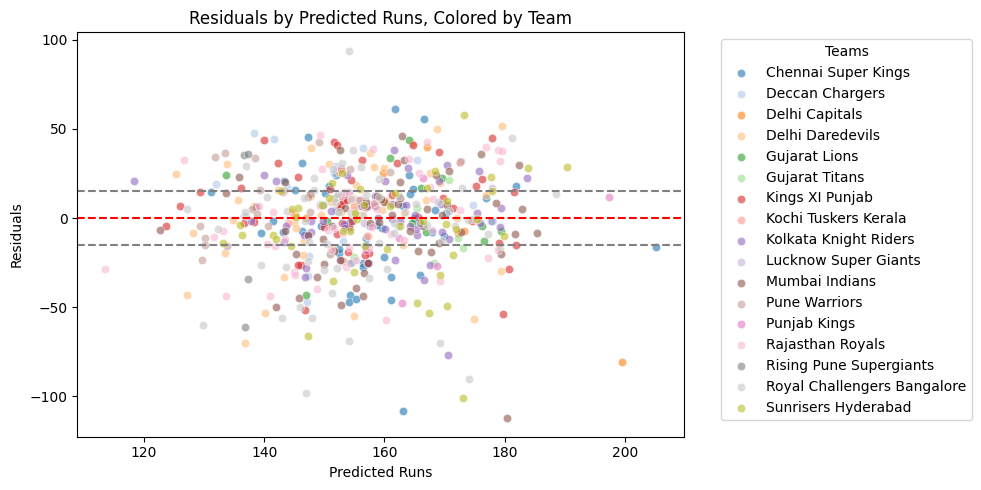

In [ ]:
residualsdf['team'] = residualsdf['team'].astype('category')

# Get the unique categories and their corresponding colors from the colormap
unique_teams = residualsdf['team'].cat.categories
colors = plt.cm.tab20(range(len(unique_teams)))

# Create a scatter plot
plt.figure(figsize=(10, 5))
for team, color in zip(unique_teams, colors):
    team_data = residualsdf[residualsdf['team'] == team]
    plt.scatter(
        team_data['predicted_innings_total_runs'],
        team_data['residual'],
        color=color,
        label=team,
        alpha=0.6,
        edgecolors='w',
        linewidth=0.5
    )

# Create a legend for the teams
plt.legend(title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add title and labels to the plot
plt.title('Residuals by Predicted Runs, Colored by Team')
plt.xlabel('Predicted Runs')
plt.ylabel('Residuals')

# Draw a horizontal line at zero for reference
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=15.074204, color='grey', linestyle='--')
plt.axhline(y=-15.074204, color='grey', linestyle='--')

# Show the plot with a tight layout
plt.tight_layout()
plt.show()

In the context of regression analysis, a residual is the difference between an observed value of the dependent variable (target) and the value predicted by the model. It's a measure of how far off the model's prediction is for an individual observation.

The residual for a given data point is calculated as:

Residual = Observed Value − Predicted Value

From the Residual plot, we can the predictions are somewhat close. There is at least a congregation of data points around the zero line, with some very clear outliers. The two grey lines represent the Median Absolute Error, which is where about 50% of the predictions should lie. So overall it is not a terrible model, but it's not very good either.

it's hard to say, but I believe some of the problem might be that some of the teams have not existed for very long, so team win percentage might be a bad factor to include in this model because some values are based on a low sample size, and should be replaced with something else.

I also think that very high scores and very low scores (the extremes) don't happen very often in IPL, so there probably was not much data to train on those cases.

### Logistic Regression
What if we simplify the task to only predict if the team wins or not instead of the exact runs that are scored.

We can use the same features to see if they can predict the win or loss

First we can recompile the data for the features and append the match outcome to the data.

In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE TABLE `cs-145-project-23-401300.IPL_cricket.LogisticCompiledFeatures` AS
WITH total_runs_scored AS (
    SELECT
        bb.ID,
        bb.BattingTeam,
        SUM(bb.total_run) AS innings_total_runs
    FROM `cs-145-project-23-401300.IPL_cricket.IPL_Ball_by_Ball_2008_2022` bb
    GROUP BY bb.ID, bb.BattingTeam
)
SELECT
    t5asr.top_5_average_strikerate,
    var.city_average_runs,
    fwo.first_wicket_over,
    ppr.power_play_runs,
    twp.WinPercentage,
    CASE
        WHEN m.WinningTeam = t5asr.team THEN 1
        ELSE 0
    END AS match_outcome
FROM `cs-145-project-23-401300.IPL_cricket.IPL_Matches_2008_2022` m
JOIN `cs-145-project-23-401300.IPL_cricket.Top5AverageStrikeRates` t5asr ON m.ID = t5asr.ID
JOIN `cs-145-project-23-401300.IPL_cricket.VenueAverageRuns` var ON m.City = var.City
JOIN `cs-145-project-23-401300.IPL_cricket.FirstWicketOver` fwo ON m.ID = fwo.ID AND t5asr.team = fwo.team
JOIN `cs-145-project-23-401300.IPL_cricket.PowerPlayRuns` ppr ON m.ID = ppr.ID AND t5asr.team = ppr.team
JOIN `cs-145-project-23-401300.IPL_cricket.TeamWinPercentage` twp ON t5asr.team = twp.team
JOIN total_runs_scored trs ON m.ID = trs.ID AND t5asr.team = trs.BattingTeam


Query is running:   0%|          |

""


The we can add a random varibale number to identify which samples should be trained on and which are test.

In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE TABLE `cs-145-project-23-401300.IPL_cricket.RandomLogisticData` AS
SELECT
  *, RAND() as rand_split
FROM `cs-145-project-23-401300.IPL_cricket.LogisticCompiledFeatures`

Query is running:   0%|          |

""


Now we can run the Logistic regression model on the training samples.

In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE MODEL `cs-145-project-23-401300.IPL_cricket.batting_outcome_model`
OPTIONS(model_type='logistic_reg', input_label_cols=['match_outcome']) AS
SELECT
  top_5_average_strikerate,
  city_average_runs,
  first_wicket_over,
  power_play_runs,
  WinPercentage,
  match_outcome
FROM `cs-145-project-23-401300.IPL_cricket.RandomLogisticData`
WHERE rand_split <= 0.75

Query is running:   0%|          |

""


Then we can use the testing data to evaluate the predictions

In [ ]:
%%bigquery --project $project_id
SELECT *
FROM
ML.EVALUATE(MODEL `cs-145-project-23-401300.IPL_cricket.batting_outcome_model`, (
    SELECT
      top_5_average_strikerate,
      city_average_runs,
      first_wicket_over,
      power_play_runs,
      WinPercentage,
      match_outcome
    FROM `cs-145-project-23-401300.IPL_cricket.RandomLogisticData`
    WHERE rand_split > 0.75
  ))


Query is running:   0%|          |

Downloading:   0%|          |

,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,0.630631,0.56,0.613682,0.59322,0.655981,0.65121


The evaluation metrics are slightly better than guessing, so some of the features may have been helpful in determining the match outcome. But it is still not very good.

I am going to eliminate the team win percentage, and instead add opening partnership runs as a feature

In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE TABLE `cs-145-project-23-401300.IPL_cricket.Logistic2` AS
SELECT
    t5asr.top_5_average_strikerate,
    var.city_average_runs,
    fwo.first_wicket_over,
    ppr.power_play_runs,
    --twp.WinPercentage,
    opr.partnership_runs,
    CASE
        WHEN m.WinningTeam = t5asr.team THEN 1
        ELSE 0
    END AS match_outcome
FROM `cs-145-project-23-401300.IPL_cricket.IPL_Matches_2008_2022` m
JOIN `cs-145-project-23-401300.IPL_cricket.Top5AverageStrikeRates` t5asr ON m.ID = t5asr.ID
JOIN `cs-145-project-23-401300.IPL_cricket.VenueAverageRuns` var ON m.City = var.City
JOIN `cs-145-project-23-401300.IPL_cricket.FirstWicketOver` fwo ON m.ID = fwo.ID AND t5asr.team = fwo.team
JOIN `cs-145-project-23-401300.IPL_cricket.PowerPlayRuns` ppr ON m.ID = ppr.ID AND t5asr.team = ppr.team
--JOIN `cs-145-project-23-401300.IPL_cricket.TeamWinPercentage` twp ON t5asr.team = twp.team
JOIN `cs-145-project-23-401300.IPL_cricket.OpeningPartnershipRuns` opr ON m.ID = opr.ID AND t5asr.team = opr.team


Query is running:   0%|          |

""


In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE TABLE `cs-145-project-23-401300.IPL_cricket.RandomLogistic2` AS
SELECT *, RAND() as rand_split
FROM `cs-145-project-23-401300.IPL_cricket.Logistic2`

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE MODEL `cs-145-project-23-401300.IPL_cricket.Logistic2_outcome_model`
OPTIONS(model_type='logistic_reg', input_label_cols=['match_outcome']) AS
SELECT
  top_5_average_strikerate,
  city_average_runs,
  first_wicket_over,
  power_play_runs,
  --WinPercentage,
  partnership_runs,
  match_outcome
FROM `cs-145-project-23-401300.IPL_cricket.RandomLogistic2`
WHERE rand_split <= 0.75

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project $project_id
SELECT *
FROM
ML.EVALUATE(MODEL `cs-145-project-23-401300.IPL_cricket.Logistic2_outcome_model`, (
    SELECT
      top_5_average_strikerate,
      city_average_runs,
      first_wicket_over,
      power_play_runs,
      --WinPercentage,
      partnership_runs,
      match_outcome
    FROM `cs-145-project-23-401300.IPL_cricket.RandomLogistic2`
    WHERE rand_split > 0.75
  ))


Query is running:   0%|          |

Downloading:   0%|          |

,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,0.651685,0.563107,0.606218,0.604167,0.633208,0.685052


It did not really change the outcome. I think there have been too few matches played in the IPL to train a model for win percentage, and it is hard to analyze team based statistics when the franchises keep changing every few years.

## K-Nearest-Neighbors

This compiles the dataset for the KNN model

In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE TABLE `cs-145-project-23-401300.IPL_cricket.KNNFeatures` AS
WITH total_runs_scored AS (
    SELECT
        bb.ID,
        bb.BattingTeam,
        SUM(bb.total_run) AS innings_total_runs
    FROM `cs-145-project-23-401300.IPL_cricket.IPL_Ball_by_Ball_2008_2022` bb
    GROUP BY bb.ID, bb.BattingTeam
)
SELECT
    m.ID,
    m.Season,
    t5asr.team,
    t5asr.top_5_average_strikerate,
    var.city_average_runs,
    fwo.first_wicket_over,
    ppr.power_play_runs,
    twp.WinPercentage,
    trs.innings_total_runs
FROM `cs-145-project-23-401300.IPL_cricket.IPL_Matches_2008_2022` m
JOIN `cs-145-project-23-401300.IPL_cricket.Top5AverageStrikeRates` t5asr ON m.ID = t5asr.ID
JOIN `cs-145-project-23-401300.IPL_cricket.VenueAverageRuns` var ON m.City = var.City
JOIN `cs-145-project-23-401300.IPL_cricket.FirstWicketOver` fwo ON m.ID = fwo.ID AND t5asr.team = fwo.team
JOIN `cs-145-project-23-401300.IPL_cricket.PowerPlayRuns` ppr ON m.ID = ppr.ID AND t5asr.team = ppr.team
JOIN `cs-145-project-23-401300.IPL_cricket.TeamWinPercentage` twp ON t5asr.team = twp.team
JOIN total_runs_scored trs ON m.ID = trs.ID AND t5asr.team = trs.BattingTeam;


Query is running:   0%|          |

""


This splits the data into a training and testing datasets

In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE TABLE `cs-145-project-23-401300.IPL_cricket.TrainingData` AS
SELECT *
FROM  `cs-145-project-23-401300.IPL_cricket.KNNFeatures`
WHERE Season < 2018 OR Season = 2022;


Query is running:   0%|          |

""


In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE TABLE `cs-145-project-23-401300.IPL_cricket.TestingData` AS
SELECT *
FROM  `cs-145-project-23-401300.IPL_cricket.KNNFeatures`
WHERE Season >= 2018 AND Season < 2022;


Query is running:   0%|          |

""


In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE TABLE `cs-145-project-23-401300.IPL_cricket.KNNPredictions` AS
WITH Distances AS (
  SELECT
    t.ID AS TestID,
    tr.ID AS TrainID,
    SQRT(
      POW(t.top_5_average_strikerate - tr.top_5_average_strikerate, 2) +
      POW(t.city_average_runs - tr.city_average_runs, 2) +
      POW(t.first_wicket_over - tr.first_wicket_over, 2) +
      POW(t.power_play_runs - tr.power_play_runs, 2) +
      POW(t.WinPercentage - tr.WinPercentage, 2)
    ) AS Distance,
    tr.innings_total_runs
  FROM
    `cs-145-project-23-401300.IPL_cricket.TestingData` t
  CROSS JOIN
    `cs-145-project-23-401300.IPL_cricket.TrainingData` tr
),
RankedDistances AS (
  SELECT
    TestID,
    innings_total_runs,
    ROW_NUMBER() OVER(PARTITION BY TestID ORDER BY Distance ASC) as rank
  FROM Distances
)
SELECT
  TestID,
  AVG(innings_total_runs) AS PredictedRuns
FROM RankedDistances
WHERE rank <= 10  -- K=5 for the nearest 5 neighbors
GROUP BY TestID;


Query is running:   0%|          |

""


In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE TABLE `cs-145-project-23-401300.IPL_cricket.KNNEvaluation` AS
SELECT
  p.TestID,
  p.PredictedRuns,
  t.innings_total_runs AS ActualRuns,
  ABS(p.PredictedRuns - t.innings_total_runs) AS Error,
  POW(p.PredictedRuns - t.innings_total_runs, 2) AS SquaredError
FROM `cs-145-project-23-401300.IPL_cricket.KNNPredictions` p
JOIN `cs-145-project-23-401300.IPL_cricket.TestingData` t
ON p.TestID = t.ID;


Query is running:   0%|          |

""


In [ ]:
%%bigquery --project $project_id
SELECT
  AVG(Error) AS MeanAbsoluteError,
  AVG(SquaredError) AS MeanSquaredError,
  SQRT(AVG(SquaredError)) AS RootMeanSquaredError
FROM `cs-145-project-23-401300.IPL_cricket.KNNEvaluation`;

Query is running:   0%|          |

Downloading:   0%|          |

,MeanAbsoluteError,MeanSquaredError,RootMeanSquaredError
0,22.290833,857.905583,29.290025


The KNN predictor did a bit worse than the Linear Regression model. Althought the r2 score of the Linear Regression was not good,  I thought that a +/- 20 run difference was not such a bad predictor.

The MeanSquaredError is very high, so there must have been some significant outliers in the predictions. Overall, with it's high computational cost, the KNN model does not seem worth it for predictions.

## Cost Analysis

**Assumptions**
Row Size: 4KB per row.
Cost per IO Operation: 1 per 10,000 read operations. 10 per 10,000 write operations.
Data Size: For 1,900 rows, the total size is 1,900 rows × 4KB/row = 7,600 KB ≈ 7.6 MB.
For 225955 rows in Ball-by-Ball data, the total size is 225955 * 4KB = 903 MB

**Linear/Logistic Regression**
Data Reading for Training: Typically involves one full scan of the dataset for training (1,500 reads).
Data Reading for Testing: Typically involves one full scan of the test set (400 reads).
Cost Estimation for Reads: Cost for Reads $=(\frac{Total Reads}{10,000} )× C_{r} 1$
Linear/Logistic Regression
Total Reads: 1,500 (training) + 400 (testing) = 1,900 reads.

Cost for Reads: $=(\frac{1500}{10,000} )× C_{r} 1 = 0.15$

Cost Estimation for Writess:

Cost for Writess $=(\frac{Total Reads}{10,000} )× C_{w} 10$

$=(\frac{400}{10,000} )× C_{w} 10 = 0.40$

KNN in SQL
Total Reads: 600,000 reads.
Cost for Reads:
$\frac {600,000}{10,000} × 1
≈ 60 $
Costs for writes would be the same $0.40$.

As we can see, the KNN model has significantly higher IO Costs. With large datasets, it would not be feasable to train on all of the data.





# Conclusions

#### How Does Winning the Toss affect a team's chance of winning?
We found from the analysis before that while winning the toss appears to confer a very little advantage across the league, the extent of its impact varies significantly among the teams. The data underscores the importance of not only the toss but also the subsequent strategic decisions and intrinsic team strengths in determining the match results.

#### How Does the match venue affect IPL team performances?
There are certain match cities where it is easier to score runs, and certain cities where it is harder. There is definately a variation from city to city. This is important to consider when trying to predict final batting totals.

This is the closest way to consider climate, pitch, and field conditions for a match.

#### Impact of Top Players in Batting. Who are some of the best Batters in the IPL?

There were several ways to look at the top Batters in the IPL. I chose to look at:

- Batting Average
- Strike Rate
- Boundaries Scored

All three of these measures had the same group of high achieving players congregated at the top. Any of these measures could be used to study the top batters. But I found strike rate to be the most relevant because it gave a good indication of a batter's expected runs per ball.

#### Impact of Top Players in Bowling. Who are some of the best Bowlers in IPL?

One of the interesting ways to judge bowlers was by looking at their Economy Rates. The best Bowlers had the lowest economy rates.

A metric related to Economy Rates were Dot Balls. The number of Dot Balls bowled in a game had a negative correlation with the Batting Team's win Rate.

It was also important to look at which over is being played to estimate the number of runs scored in an over. There are certain upward and downward trends in each over during a cricket match.

#### Other Possible Metrics
**Win Rate by Powerplay Runs Range:**

There is a strong positive correlation between runs scored during the Powerplay (the first few overs of the innings where fielding restrictions are in place) and the likelihood of winning the match.
- Teams scoring in the highest range of 80-99 runs in the Powerplay have an exceptional win rate of 91%. However, this result is based on a very small sample size (n=11), which suggests such high scoring in the Powerplay is rare.
- The second-highest win rate is in the 60-79 runs range, with a win rate of 70% over a larger sample size (n=230), indicating a more reliable pattern where a strong start in the Powerplay often leads to a win.
- There is a noticeable increase in win rate from the 40-59 runs range to the 60-79 runs range, suggesting that crossing the 60-run mark in the Powerplay can be a significant threshold for improving a team’s chances of winning.

The power play has the potential to be highly rewarding to the batting team, but it could cause batters to take more risks for boundaries.

**Win Rate by Opening Partnership:**

Similar to the Powerplay runs, there's a positive relationship between the runs scored by the opening partnership and the win rate.
- The graph shows a progressive increase in the win rate as the opening partnership contributes more runs, with the win rate reaching its peak when the opening partnership scores between 150-174 runs.
- The trend line indicates a steady incline, reinforcing the idea that a solid foundation laid by the opening batsmen is crucial for a team’s success.
- The increase in win rate from one range to the next is consistent and significant, suggesting that every additional run added by the opening partnership progressively increases the probability of a win.

These trends could be because if an opening partnership stays on the field longer, they can take more risks when batting because they know they do not have to save wickets.

# Summary of Predictive Models

It turns out that it is very hard to predict if a team will win early in a match. Unless they start out having a dominant or abysmal performance, it is really hard to predict where the final batting score will end or if a team will win. However, the features marginally did improve the model to be slightly better than random guessing. And the run predictor did end up in the +/- 20 runs range on average.

#Sources:

Dataset:https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset/data

Images: some made with python, some with Tableau

Assistance: Ed, StackOverflow, ChatGPT, other Kaggle models